<h4>Другий рівень (ускладнений)</h4>

Професійний Data scientist має вміти працювати з різнотипними датасетами, обробляти їх, візуалізувати та знаходити закономірності. Тому
першим кроком є вибір датасету. Пропонуємо для подальших робіт вибрати датасет, що вам сподобається, із архіву 
https://archive.ics.uci.edu/ml/index.php/.
Датасет має відповідати таким вимогам:<br>
1) Data Set Characteristics: Multivariate<br>
2) Attribute Characteristics: Categorical, Integer, Real<br>
3) Number of Attributes: at least 2 integers/real<br>
4) Missing Values? YES!!!!!<br>

# My DataFrame
<img src="./my_df.png" alt="DataFrame">

# Info about Attribute

Attribute: Attribute Range

  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     
                               alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo

  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.



In [2]:
import os
import urllib.request
import time
import zipfile
import pandas as pd
import numpy as np 
import missingno as ms
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup")

Setup


Download data

In [3]:
def download_csv(directory):
    url = "https://archive.ics.uci.edu/static/public/10/automobile.zip"
    retries = 3
    for attempt in range(retries):
        try:
            with urllib.request.urlopen(url) as wp:
                text = wp.read()
            break
        except urllib.error.URLError as e:
            print(f"Error downloading data: {e}")
            if attempt < retries - 1:
                print(f"Retrying download in 5 seconds...")
                time.sleep(5)
            else:
                print(f"Failed to download data after {retries} attempts.")
                continue

    filename = f'Automobile.zip'
    filepath = os.path.join(directory, filename)

    try:
        with open(filepath, 'wb') as out:
            out.write(text)
        print(f"Process is downloading:\nfile_zip:{filename}...\n")
        print(f"File_zip:{filename} downloaded successfully.")
        print("=" * 80)
    except IOError as e:
        print(f"Error writing file {filename}: {e}")

def unzip(directory):
    zip_file = os.path.join(directory, "Automobile.zip")
    with zipfile.ZipFile(zip_file, 'r') as zip_data:
        zip_data.extractall(path=directory)
        for filename in zip_data.namelist():
            if filename.endswith('.data'):
                new_filename = 'Automobile.csv'
                os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
            if os.path.exists(zip_file):
                os.unlink(zip_file)
        print(f"Files extracted and renamed {new_filename} successfully.")

def clean_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("[+] Directory created successfully.")

    if input("Do you want to clean the directory? (y/n): ").lower() == 'y':
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            if os.path.exists(filepath):
                os.unlink(filepath)
        print("[+] Directory cleaned successfully.\n")
    else:
        print("[+] Directory cleaning skipped.\n")

In [4]:
directory="/home/kali/Desktop/data_analysis/workspace_4/lab_4_venv/my_df_automobile/"
clean_directory(directory)
download_csv(directory)
unzip(directory)

[+] Directory cleaned successfully.

Process is downloading:
file_zip:Automobile.zip...

File_zip:Automobile.zip downloaded successfully.
Files extracted and renamed Automobile.csv successfully.


Data cleaning and other info about dataset

In [5]:
def read(filepath):  
    headers = ["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors",
                "body_style","drive_wheels","engine_location","wheel_base","length","width","height",
                "curb_weight","engine_type","num_of_cylinders","engine_size","fuel_system","bore",
                "stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]
    data_frame = pd.read_csv(filepath, names=headers, na_values='?')
    data_frame_numpy = data_frame.to_numpy()
    
    # Візуалізація кількості пропущених значень у кожному стовпці
    missing_values = data_frame.isnull().sum()
    plt.figure(figsize=(15, 6))
    missing_values.plot(kind='bar')
    plt.title('Кількість пропущених значень у кожному стовпці')
    plt.xlabel('Назва стовпця')
    plt.ylabel('Кількість пропущених значень')
    plt.show()
    
    # Візуалізація матриці пропущених значень
    ms.matrix(data_frame)
    plt.title('Матриця пропущених значень')
    plt.show()
    
    # Виведення загальної інформації про датафрейм
    print("Загальна інформація про датафрейм:")
    print(data_frame.info())
    
    # Виведення перших та останніх записів
    print("\nПерші записи у датафреймі:")
    print(data_frame.head())
    print("\nОстанні записи у датафреймі:")
    print(data_frame.tail())
    
    return data_frame, data_frame_numpy

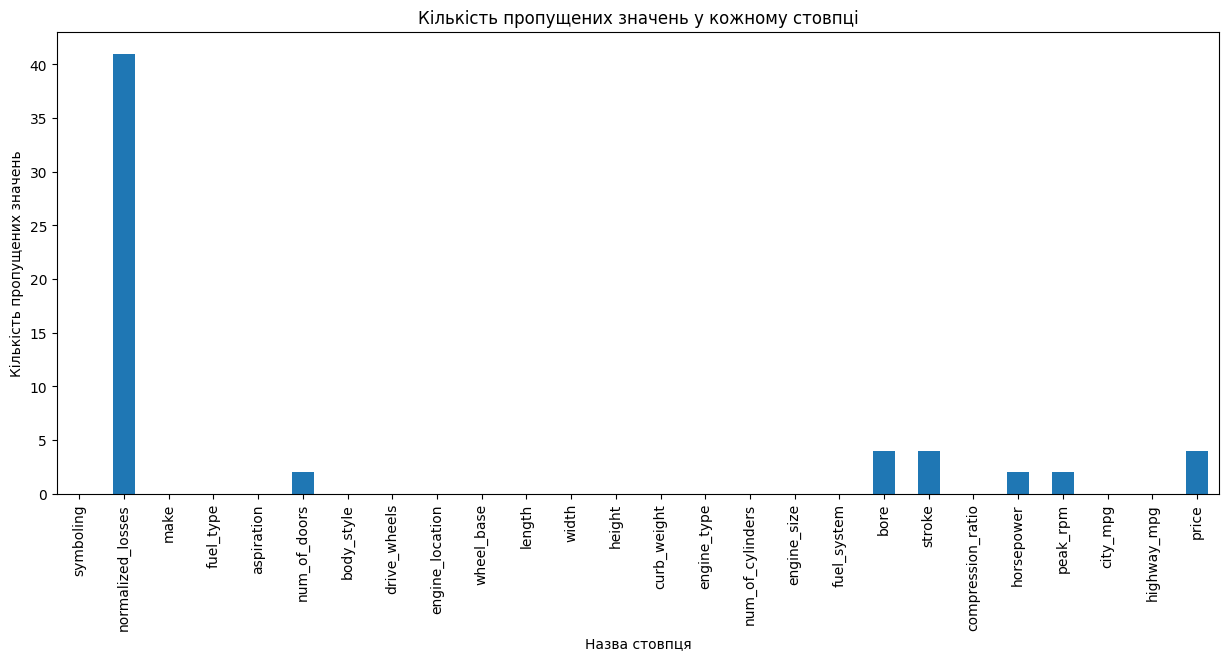

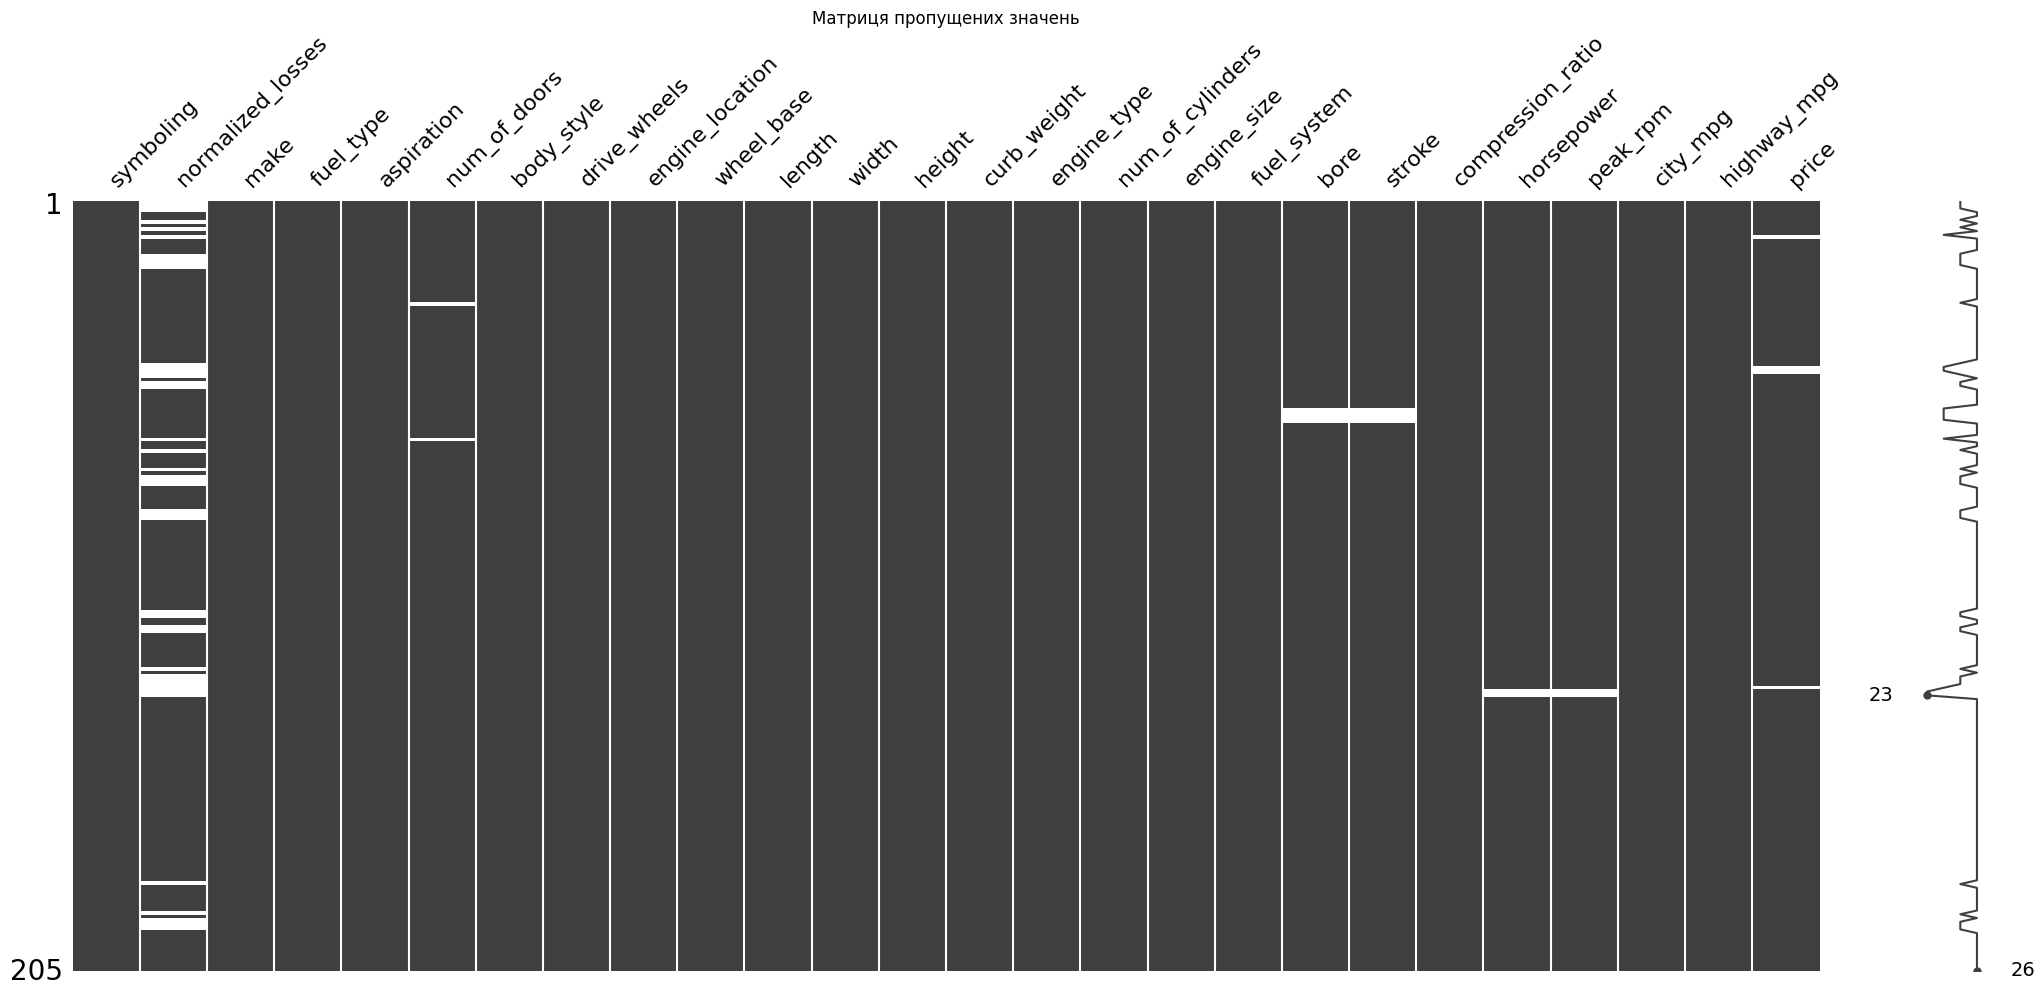

Загальна інформація про датафрейм:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    obje

In [6]:
filepath = "/home/kali/Desktop/data_analysis/workspace_4/lab_4_venv/my_df_automobile/Automobile.csv" 

from tabulate import tabulate
cleaned_data_frame, cleaned_data_frame_numpy = read(filepath)

def print_head(data):
    if isinstance(data, pd.DataFrame):
        table_data = data.head(15).values.tolist()
        headers = data.columns.tolist()
        print("Перші 15 рядків DataFrame:")
        print(tabulate(table_data, headers=headers, tablefmt='pretty'))
    elif isinstance(data, np.ndarray):
        table_data = data[:15].tolist()
        print("Перші 15 рядків NumPy масиву:")
        print(tabulate(table_data, tablefmt='pretty'))
    else:
        print("Непідтримуваний тип даних. Підтримуються лише DataFrame або NumPy масив.")

print_head(cleaned_data_frame) 
print_head(cleaned_data_frame_numpy)

<h4>Завдання другого рівня</h4>


<h4>Numpy array and dataframe</h4>

1. Поборотися із зниклими даними. Для цього подивитись https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

Видалення стовпця з відсутніми даними:

In [7]:
def first_method(data_frame):
    headers = ["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors",
                "body_style","drive_wheels","engine_location","wheel_base","length","width","height",
                "curb_weight","engine_type","num_of_cylinders","engine_size","fuel_system","bore",
                "stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]
    data_frame = pd.read_csv(filepath, names=headers, na_values='?')
    data_frame.dropna(inplace=True) 
    
    data_numpy = data_frame.to_numpy()
    ms.matrix(data_frame)
    plt.title('Матриця пропущених значень')
    plt.show()
    
    return data_frame, data_numpy  

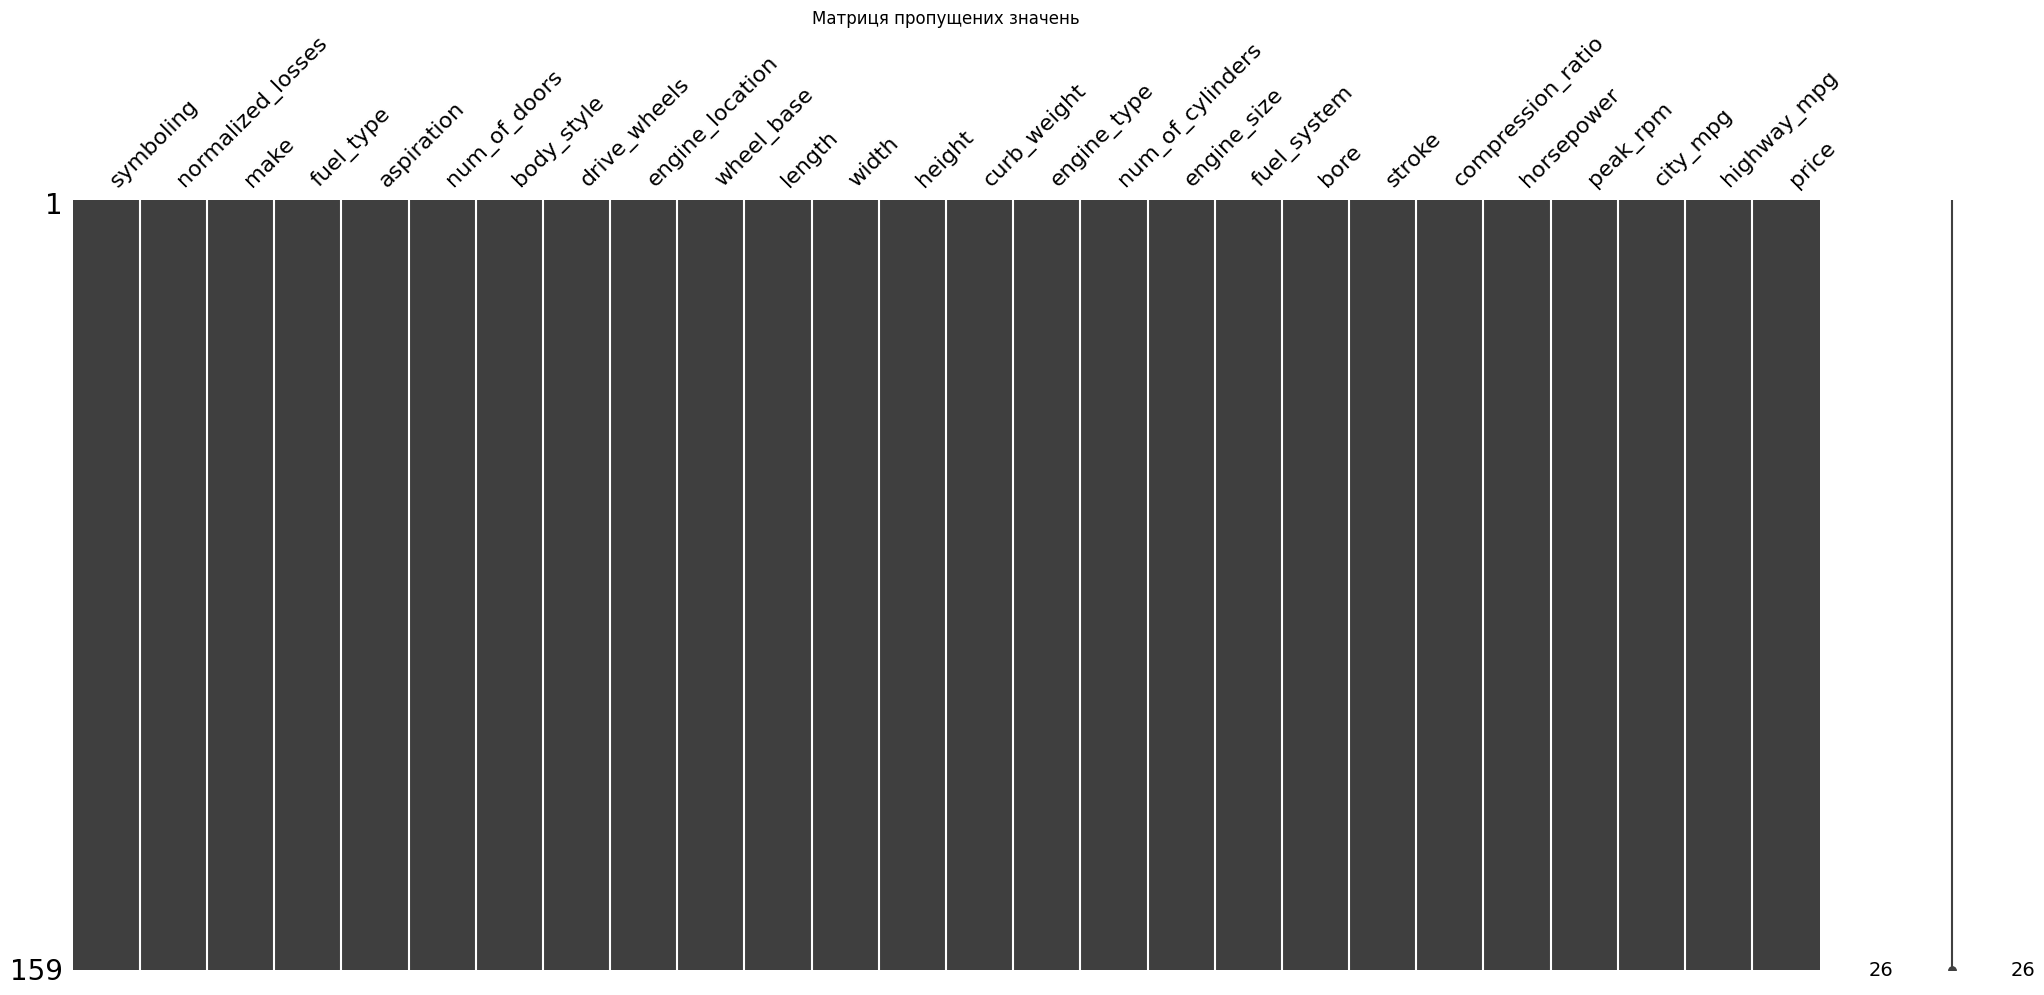

Перші 15 рядків DataFrame:
+-----------+-------------------+-----------+-----------+------------+--------------+------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+------------------+-------------+-------------+------+--------+-------------------+------------+----------+----------+-------------+---------+
| symboling | normalized_losses |   make    | fuel_type | aspiration | num_of_doors | body_style | drive_wheels | engine_location | wheel_base | length | width | height | curb_weight | engine_type | num_of_cylinders | engine_size | fuel_system | bore | stroke | compression_ratio | horsepower | peak_rpm | city_mpg | highway_mpg |  price  |
+-----------+-------------------+-----------+-----------+------------+--------------+------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+------------------+-------------+-------------+------+--------+-------------------+----------

In [8]:
filepath = "/home/kali/Desktop/data_analysis/workspace_4/lab_4_venv/my_df_automobile/Automobile.csv" 
cleaned_data_frame, cleaned_data_frame_numpy = first_method(filepath)
print_head(cleaned_data_frame) 
print_head(cleaned_data_frame_numpy)

Заповнення пропущених значень – імпутація:

In [9]:
def fill_missing_values(df, column):
    mean_value = df[column][df[column] != "?"].astype(float).mean()
    df[column] = df[column].replace("?", np.nan).astype(float).fillna(mean_value)

def second_method(filepath):
    headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_of_doors",
               "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height",
               "curb_weight", "engine_type", "num_of_cylinders", "engine_size", "fuel_system", "bore",
               "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

    data_frame = pd.read_csv(filepath, names=headers)

    columns_to_fill = ["normalized_losses", "price", "horsepower", "bore", "peak_rpm", "stroke"]
    for column in columns_to_fill:
        fill_missing_values(data_frame, column)

    mode_value = data_frame["num_of_doors"][data_frame["num_of_doors"] != "?"].mode().iloc[0]
    data_frame["num_of_doors"] = data_frame["num_of_doors"].replace("?", np.nan).fillna(mode_value)

    ms.matrix(data_frame)
    plt.title('Матриця пропущених значень')
    plt.show()

    data_numpy = data_frame.to_numpy()

    return data_frame, data_numpy


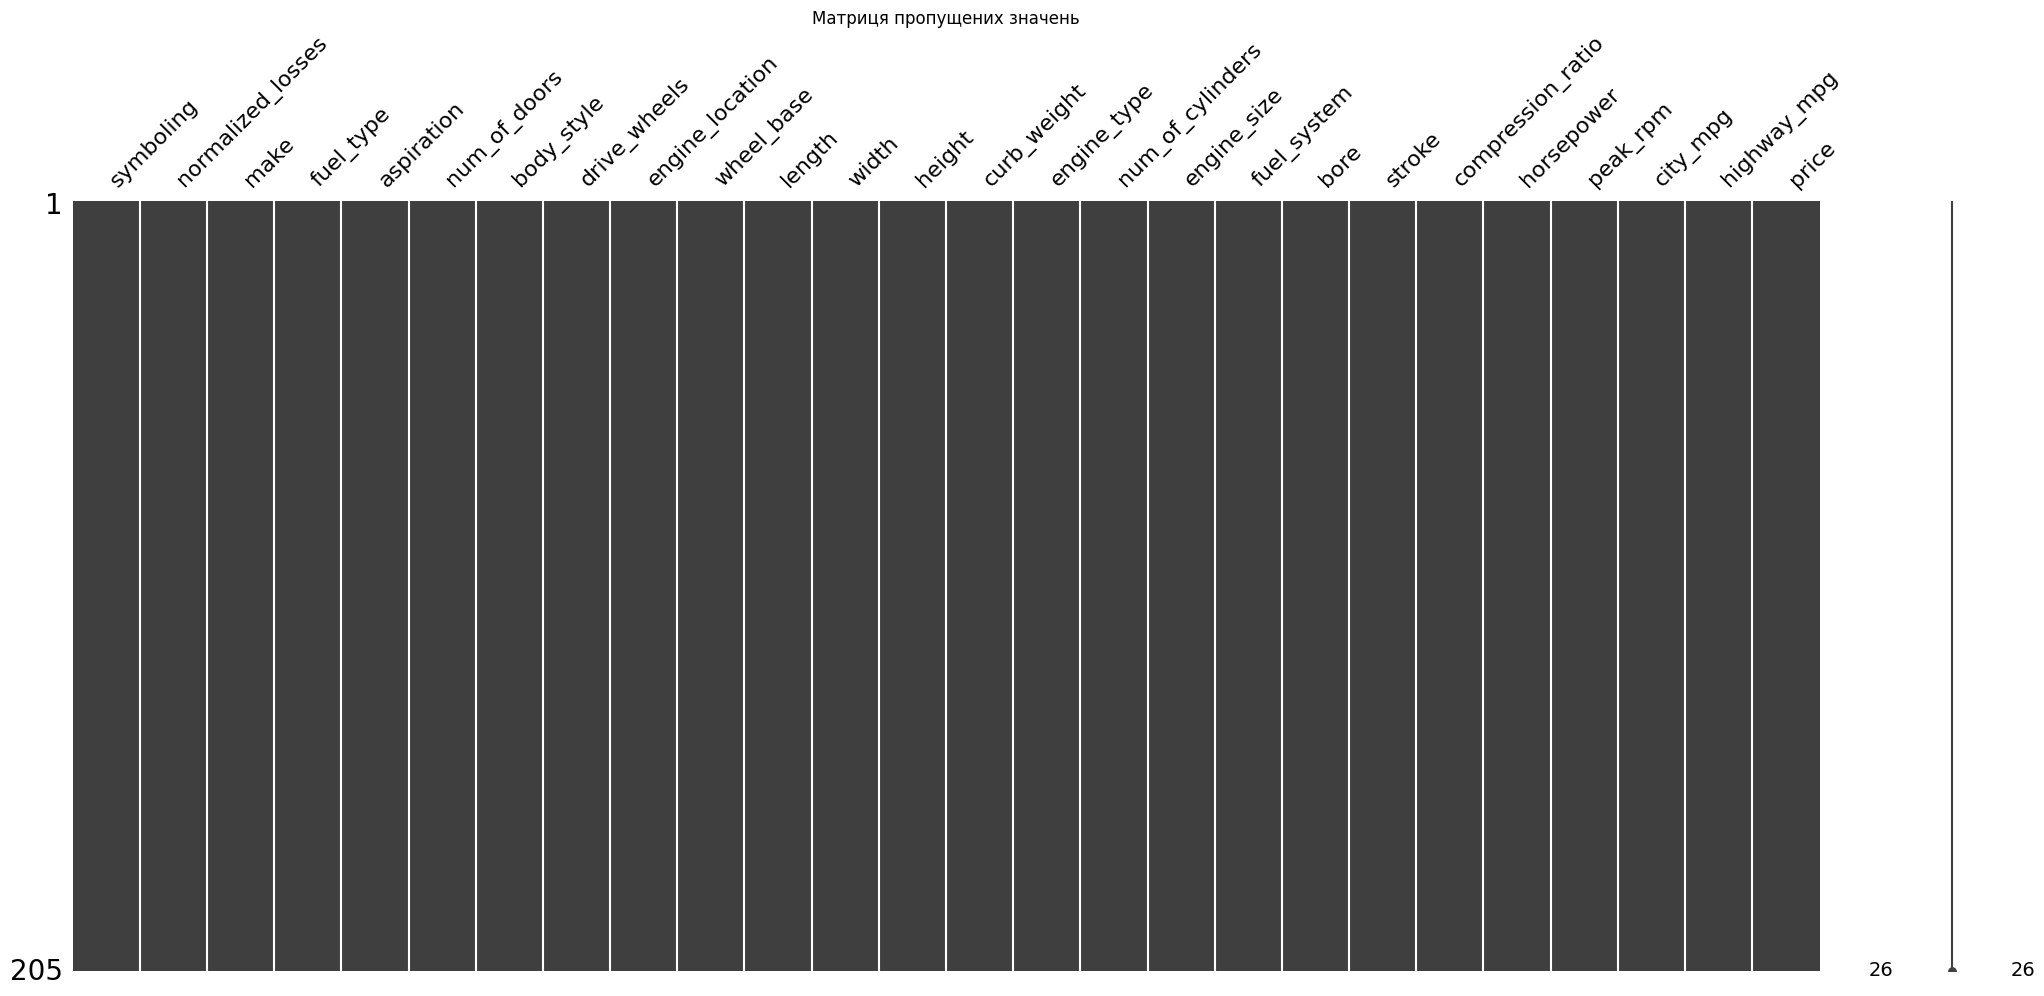

Перші 15 рядків DataFrame:
+-----------+-------------------+-------------+-----------+------------+--------------+-------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+------------------+-------------+-------------+------+--------+-------------------+------------+----------+----------+-------------+--------------------+
| symboling | normalized_losses |    make     | fuel_type | aspiration | num_of_doors | body_style  | drive_wheels | engine_location | wheel_base | length | width | height | curb_weight | engine_type | num_of_cylinders | engine_size | fuel_system | bore | stroke | compression_ratio | horsepower | peak_rpm | city_mpg | highway_mpg |       price        |
+-----------+-------------------+-------------+-----------+------------+--------------+-------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+------------------+-------------+-------------+------+--------

In [10]:
filepath = "/home/kali/Desktop/data_analysis/workspace_4/lab_4_venv/my_df_automobile/Automobile.csv" 
cleaned_data_frame_2, cleaned_data_frame_numpy_2 = second_method(filepath)
print_head(cleaned_data_frame_2) 
print_head(cleaned_data_frame_numpy_2)
print(cleaned_data_frame_2['num_of_cylinders'].unique())


In [11]:
from sklearn.impute import SimpleImputer

def third_method(filepath):
    headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_of_doors",
               "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height",
               "curb_weight", "engine_type", "num_of_cylinders", "engine_size", "fuel_system", "bore",
               "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

    data_frame = pd.read_csv(filepath, names=headers)

    columns_to_fill = ["normalized_losses", "price", "horsepower", "bore", "peak_rpm", "stroke"]
    
    for column in columns_to_fill:
        data_frame[column] = data_frame[column].replace('?', np.nan)
        data_frame[column] = data_frame[column].astype(float)
        data_frame[column].isnull()
        imputer = SimpleImputer(strategy='median')
        data_frame[column] = imputer.fit_transform(data_frame[column].values.reshape(-1, 1))
        
    ms.matrix(data_frame)
    plt.title('Матриця пропущених значень')
    plt.show()

    data_numpy = data_frame.to_numpy()

    return data_frame, data_numpy

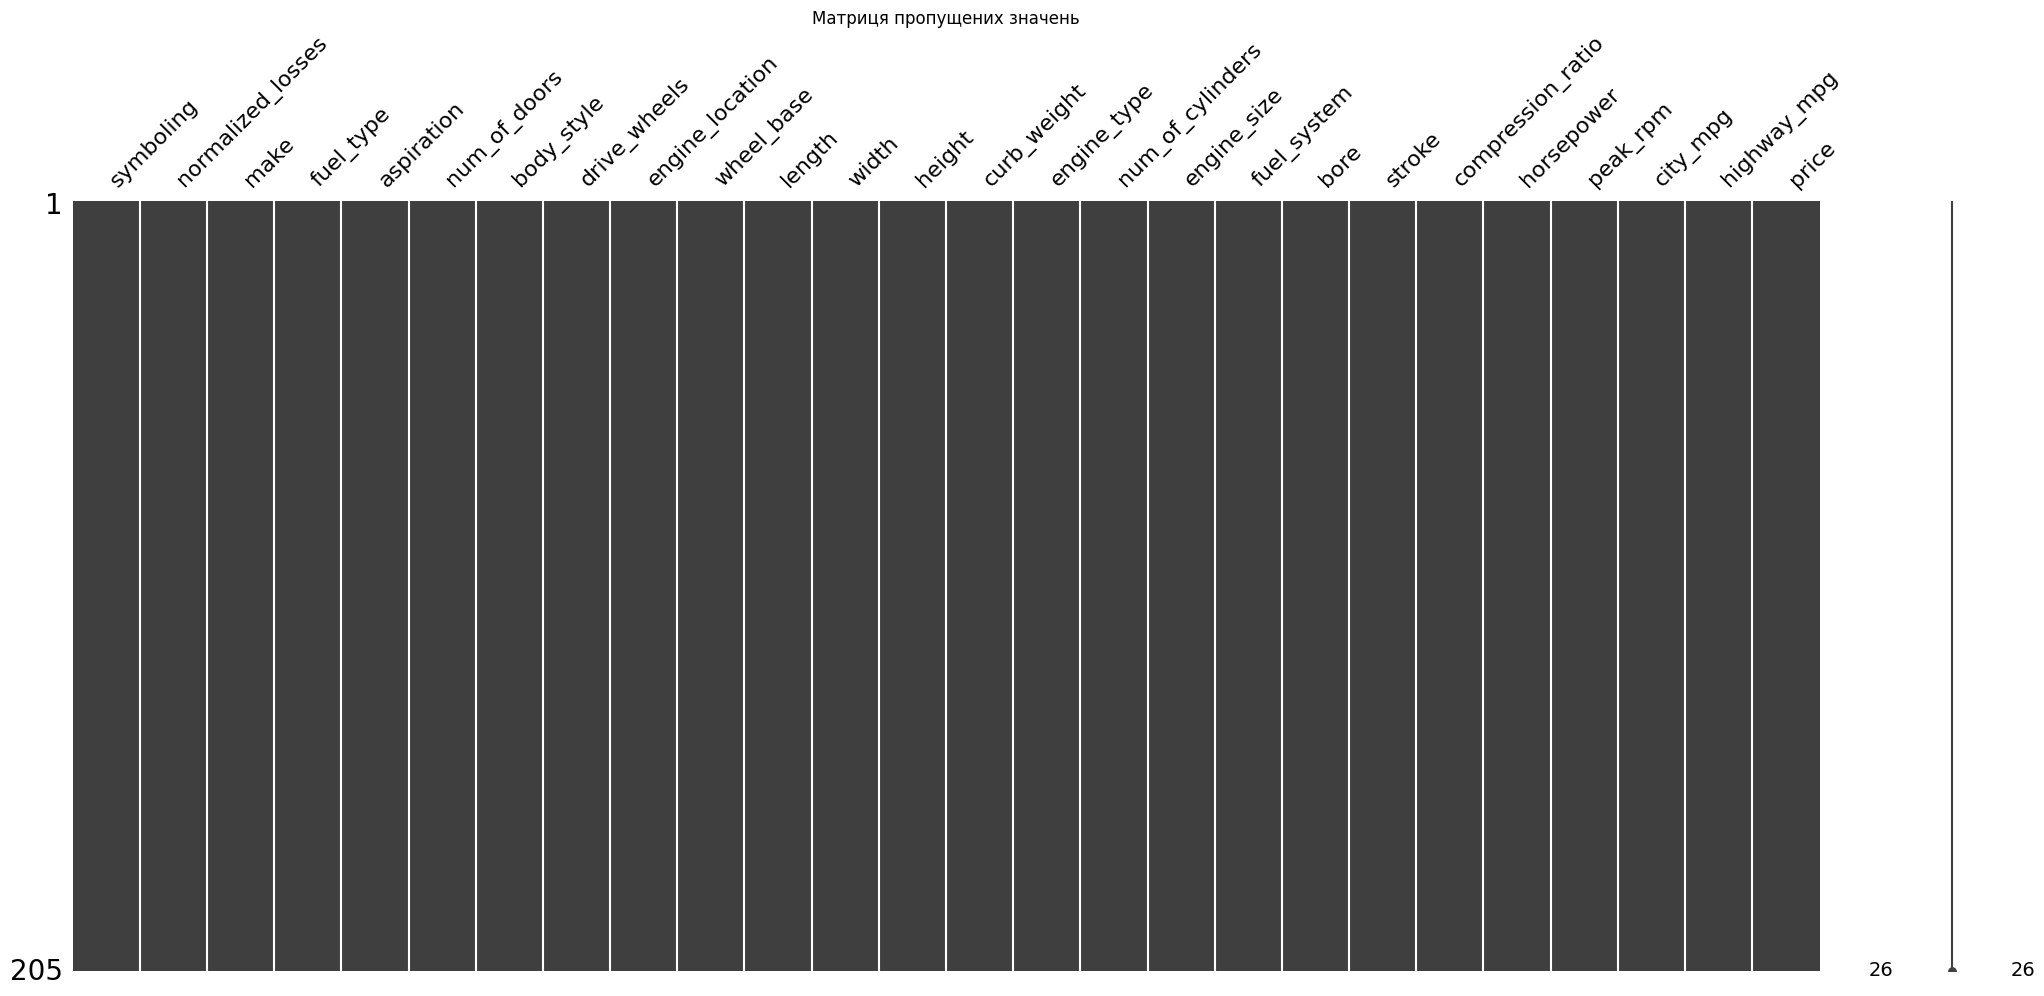

Перші 15 рядків DataFrame:
+-----------+-------------------+-------------+-----------+------------+--------------+-------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+------------------+-------------+-------------+------+--------+-------------------+------------+----------+----------+-------------+---------+
| symboling | normalized_losses |    make     | fuel_type | aspiration | num_of_doors | body_style  | drive_wheels | engine_location | wheel_base | length | width | height | curb_weight | engine_type | num_of_cylinders | engine_size | fuel_system | bore | stroke | compression_ratio | horsepower | peak_rpm | city_mpg | highway_mpg |  price  |
+-----------+-------------------+-------------+-----------+------------+--------------+-------------+--------------+-----------------+------------+--------+-------+--------+-------------+-------------+------------------+-------------+-------------+------+--------+-------------------+-

In [12]:
filepath = "/home/kali/Desktop/data_analysis/workspace_4/lab_4_venv/my_df_automobile/Automobile.csv" 
cleaned_data_frame_3, cleaned_data_frame_numpy_3 = third_method(filepath)
print_head(cleaned_data_frame_3) 
print_head(cleaned_data_frame_numpy_3)

2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [13]:
def normalize_dataset(dataset):
    normalized_dataset = []
    for row in dataset:
        min_val = min(row)
        max_val = max(row)
        normalized_row = [(x - min_val) / (max_val - min_val) for x in row]
        normalized_dataset.append(normalized_row)
    return normalized_dataset

def standardize_dataset(dataset):
    standardized_dataset = []
    for row in dataset:
        mean_val = sum(row) / len(row)
        std_dev = (sum([(x - mean_val) ** 2 for x in row]) / len(row)) ** 0.5
        standardized_row = [(x - mean_val) / std_dev for x in row]
        standardized_dataset.append(standardized_row)
    return standardized_dataset

# Приклад використання:
dataset = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Нормалізація датасету
normalized_dataset = normalize_dataset(dataset)
print("Normalized dataset:")
for row in normalized_dataset:
    print(row)

# Стандартизація датасету
standardized_dataset = standardize_dataset(dataset)
print("\nStandardized dataset:")
for row in standardized_dataset:
    print(row)


Normalized dataset:
[0.0, 0.5, 1.0]
[0.0, 0.5, 1.0]
[0.0, 0.5, 1.0]

Standardized dataset:
[-1.224744871391589, 0.0, 1.224744871391589]
[-1.224744871391589, 0.0, 1.224744871391589]
[-1.224744871391589, 0.0, 1.224744871391589]


https://medium.com/@reinapeh/16-data-feature-normalization-methods-using-python-with-examples-part-1-of-3-26578b2b8ba6

In [14]:
# Функція для нормалізації методом max_abs_scaling
def max_abs_scaling(data_frame):
    numerical_columns = data_frame.select_dtypes(include=[np.number]).columns
    data_frame[numerical_columns] = data_frame[numerical_columns] / data_frame[numerical_columns].abs().max()
    return data_frame

# Функція для нормалізації методом normalization (min-max)
def normalization(data_frame):
    non_categorical_columns = [col for col in data_frame.columns if data_frame[col].dtype != 'object']
    
    for column in non_categorical_columns:
        min_val = data_frame[column].min()
        max_val = data_frame[column].max()
        data_frame[column] = (data_frame[column] - min_val) / (max_val - min_val)  
    return data_frame

# Функція для нормалізації методом tanh_normalization
def tanh_normalization(data_frame_numpy):
    return np.tanh(data_frame_numpy) 

In [15]:
normalized_data_max_abs = max_abs_scaling(cleaned_data_frame_3)
print("Normalized data using max_abs_scaling:")
print_head(normalized_data_max_abs)

# Виклик функції normalization
normalized_data_min_max = normalization(cleaned_data_frame_3)
print("\nNormalized data using min-max normalization:")
print_head(normalized_data_min_max)

# Виклик функції tanh_normalization
normalized_data_tanh = tanh_normalization(normalized_data_max_abs.select_dtypes(include=[np.number]).values)  
print("\nNormalized data using tanh normalization:")
print_head(normalized_data_tanh)

Normalized data using max_abs_scaling:
Перші 15 рядків DataFrame:
+--------------------+-------------------+-------------+-----------+------------+--------------+-------------+--------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+------------------+--------------------+-------------+--------------------+--------------------+---------------------+--------------------+--------------------+---------------------+---------------------+---------------------+
|     symboling      | normalized_losses |    make     | fuel_type | aspiration | num_of_doors | body_style  | drive_wheels | engine_location |     wheel_base     |       length       |       width        |       height       |    curb_weight     | engine_type | num_of_cylinders |    engine_size     | fuel_system |        bore        |       stroke       |  compression_ratio  |     horsepower     |      peak_rpm      |      city_mpg       | 

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

Histogram – точне графічне представлення розподілу числових даних

In [16]:
def histogram(data_frame, attribute, ranges):
    counts, _ = np.histogram(data_frame[attribute], bins=ranges)

    sns.set_style("whitegrid")

    plt.figure(figsize=(15, 6))
    plt.title(attribute)
    sns.barplot(x=ranges[:-1], y=counts, color="steelblue", edgecolor='black', linewidth=1.5, alpha=0.8)  
    plt.xlabel(attribute)
    plt.ylabel("Count")
    plt.xticks(rotation=45) 

    for i, count in enumerate(counts):
        plt.text(i, count, f"{count}", ha='center', va='bottom')

    print("Ranges:", ranges)
    print("Counts:", counts)
    plt.grid(True) 
    plt.show()

Ranges: [48, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288]
Counts: [55 49 51 13 23  8  4  0  1  1]


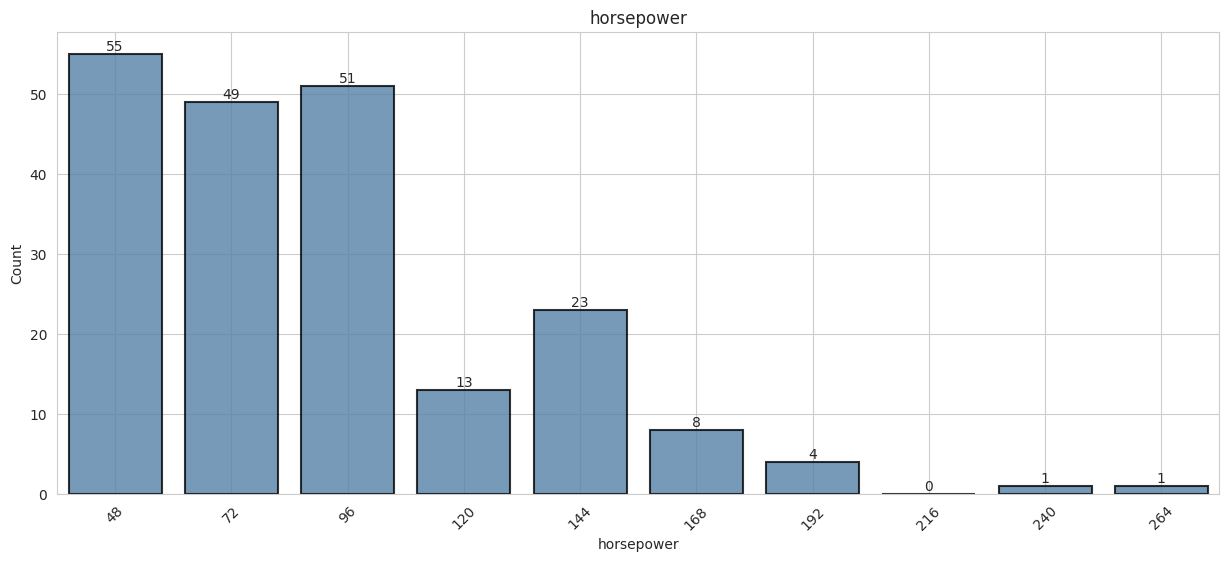

In [17]:
ranges = [48,  72,  96, 120, 144, 168, 192, 216, 240, 264, 288]
histogram(cleaned_data_frame_2, 'horsepower', ranges)

4. Збудувати графік залежності одного integer/real атрибута від іншого.


Integer - ці змінні мають цілі значення, які можна впорядкувати. Наприклад, вік, кількість дітей, рівень доходу тощо.<br>
Real - ці змінні можуть мати будь-які значення, як цілі, так і дробові. Наприклад, ціна, вага, температура тощо.

Line Chart - показує еволюцію числових значень

In [18]:
def lineplot(data_frame, x_attribute, y_attribute):
    plt.figure(figsize=(15, 6))
    sns.set_style("whitegrid")
    sns.lineplot(x=x_attribute, y=y_attribute, data=data_frame)
    plt.xlabel(f"{x_attribute} ({data_frame[x_attribute].dtype})")
    plt.ylabel(f"{y_attribute} ({data_frame[y_attribute].dtype})")
    plt.title(f"{x_attribute} vs {y_attribute}")
    plt.show()

Перед побудовую, підготую дані: num_of_cylinders

In [19]:
def calc_num_cylinders(data):
    # Створює словник, що відповідає текстовим представленням кількості циліндрів їх чисельним значенням
    data_cylynders = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
    # Перевіряє, чи є значення 'cylstr' у словнику 'cyls'
    if(data in data_cylynders.keys()):
        # Якщо так, повертає відповідне значення кількості циліндрів
        return data_cylynders[data]
    # Якщо не знайдено, повертає 0
    return None

In [20]:
# Застосовує функцію calc_num_cylinders до стовпця 'num_of_cylinders' та створює новий стовпець ''num_of_cylinders'' з результатами
cleaned_data_frame_2['num_of_cylinders'] = cleaned_data_frame_2['num_of_cylinders'].apply(lambda x: calc_num_cylinders(x))
print(cleaned_data_frame_2['num_of_cylinders'])

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num_of_cylinders, Length: 205, dtype: int64


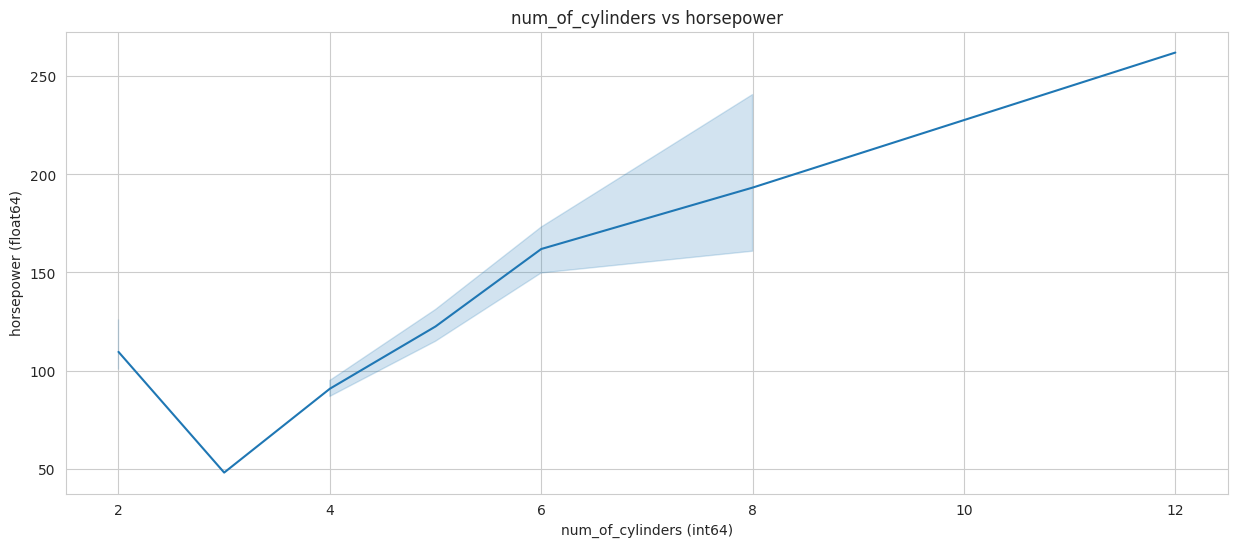

In [21]:
lineplot(cleaned_data_frame_2, 'num_of_cylinders', 'horsepower') 

Scatter plot – показує взаємозалежність 2-х числових величин

In [22]:
def scatter_plot(data_frame, x_attribute, y_attribute):
    plt.figure(figsize=(15, 6))
    sns.set_style("whitegrid")
    sns.scatterplot(x=data_frame[x_attribute], y=data_frame[y_attribute])
    plt.xlabel(f"{x_attribute} ({data_frame[x_attribute].dtype})") 
    plt.ylabel(f"{y_attribute} ({data_frame[y_attribute].dtype})")
    plt.title(f"Scatter plot: {x_attribute} vs {y_attribute}")
    plt.show()

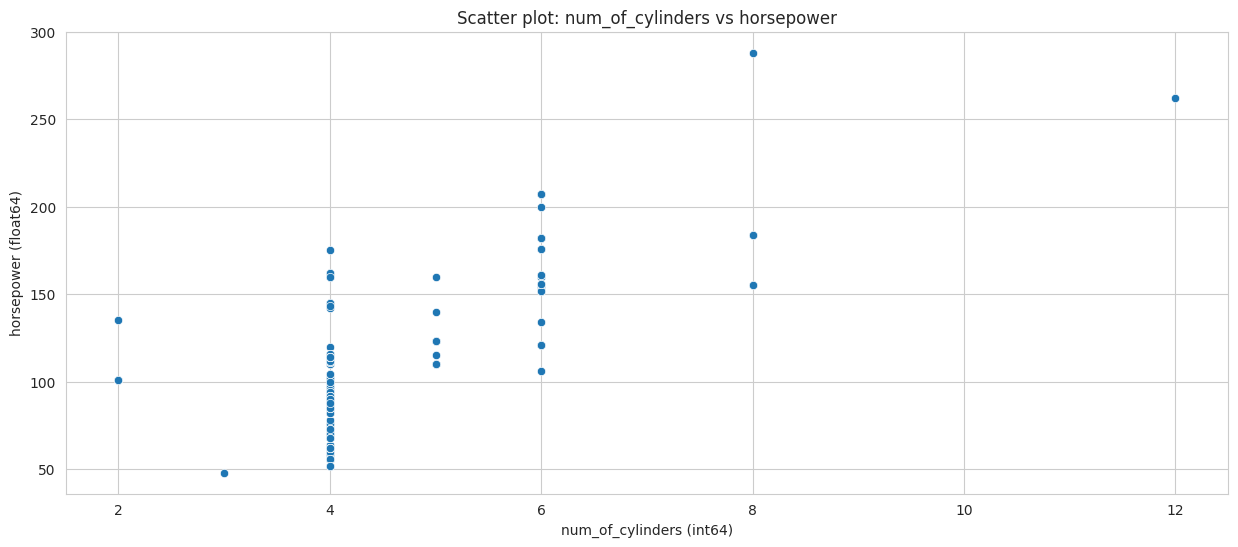

In [23]:
scatter_plot(cleaned_data_frame_2, 'num_of_cylinders', 'horsepower')


In [24]:
def scatter_with_hue(data_frame, x_attribute, y_attribute, hue_attribute):
    plt.figure(figsize=(15, 6))
    sns.scatterplot(data=data_frame, x=x_attribute, y=y_attribute, hue=hue_attribute, palette='viridis')
    plt.title(f'{x_attribute} vs {y_attribute} with {hue_attribute}', fontsize=16)
    plt.xlabel(x_attribute, fontsize=12)
    plt.ylabel(y_attribute, fontsize=12)
    plt.legend(title=hue_attribute, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

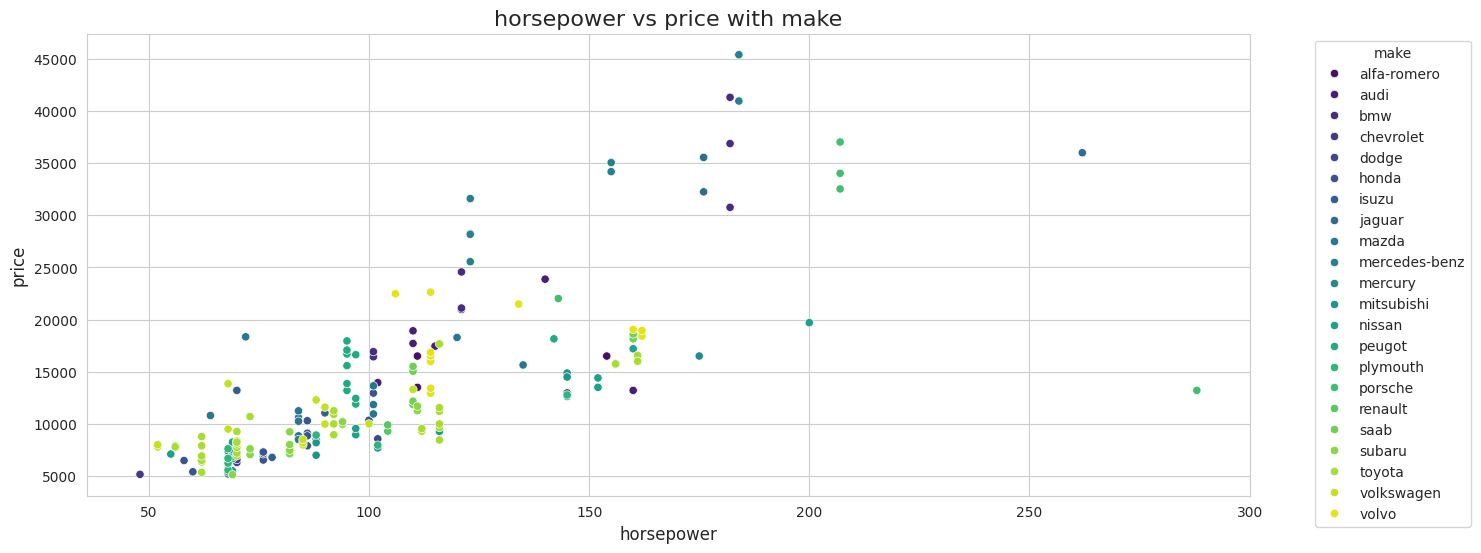

In [25]:
scatter_with_hue(cleaned_data_frame_2, 'horsepower', 'price', 'make')

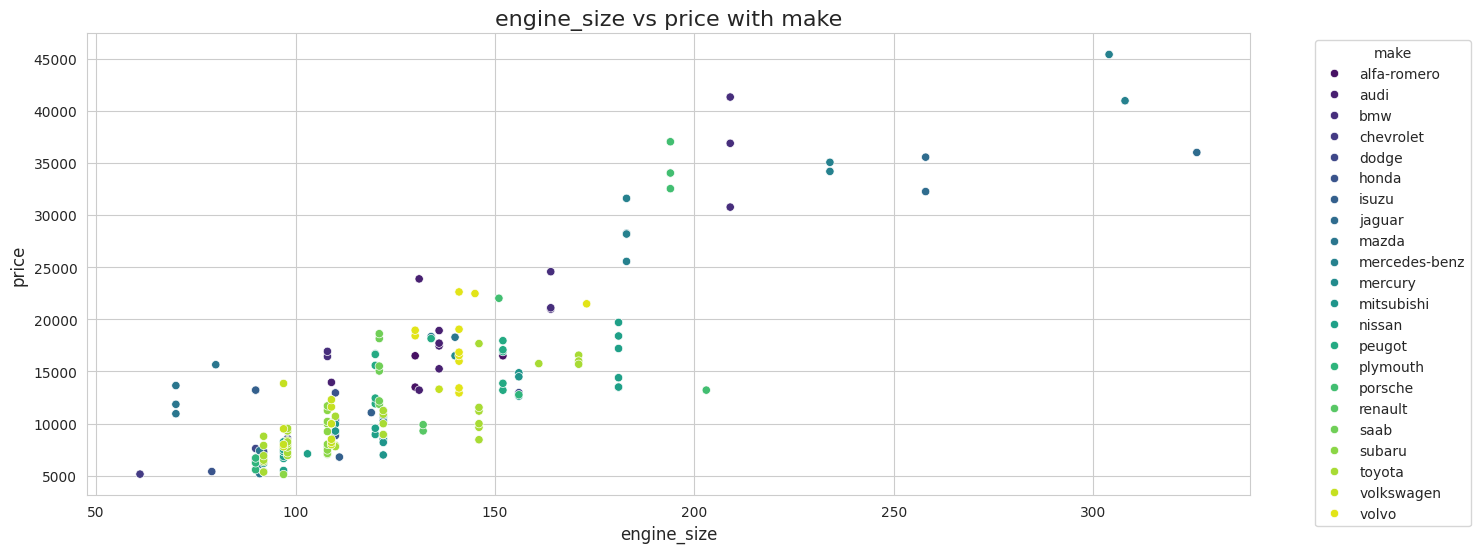

In [26]:
scatter_with_hue(cleaned_data_frame_2, 'engine_size', 'price', 'make')

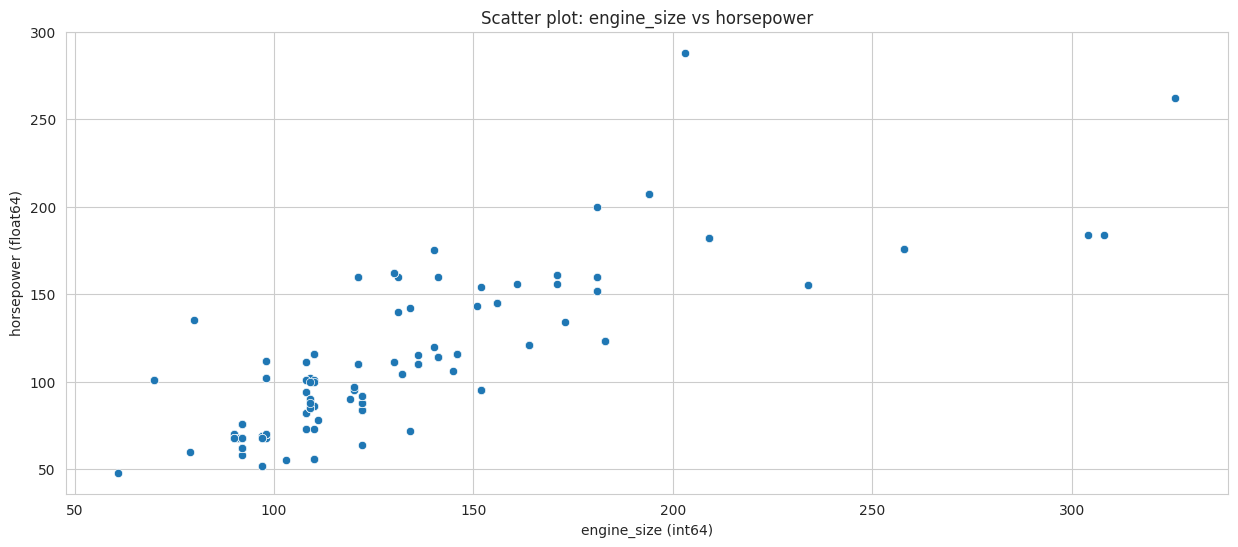

In [27]:
scatter_plot(cleaned_data_frame_2, 'engine_size', 'horsepower')

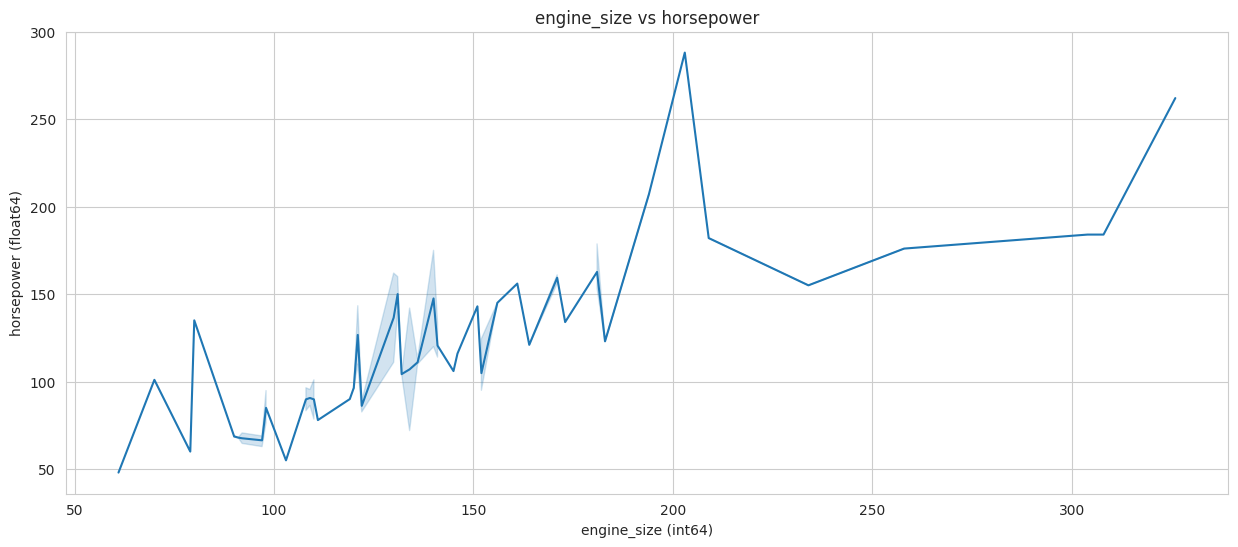

In [28]:
lineplot(cleaned_data_frame_2, 'engine_size', 'horsepower') 

# Additional analysis

Find the most popular car with countplot

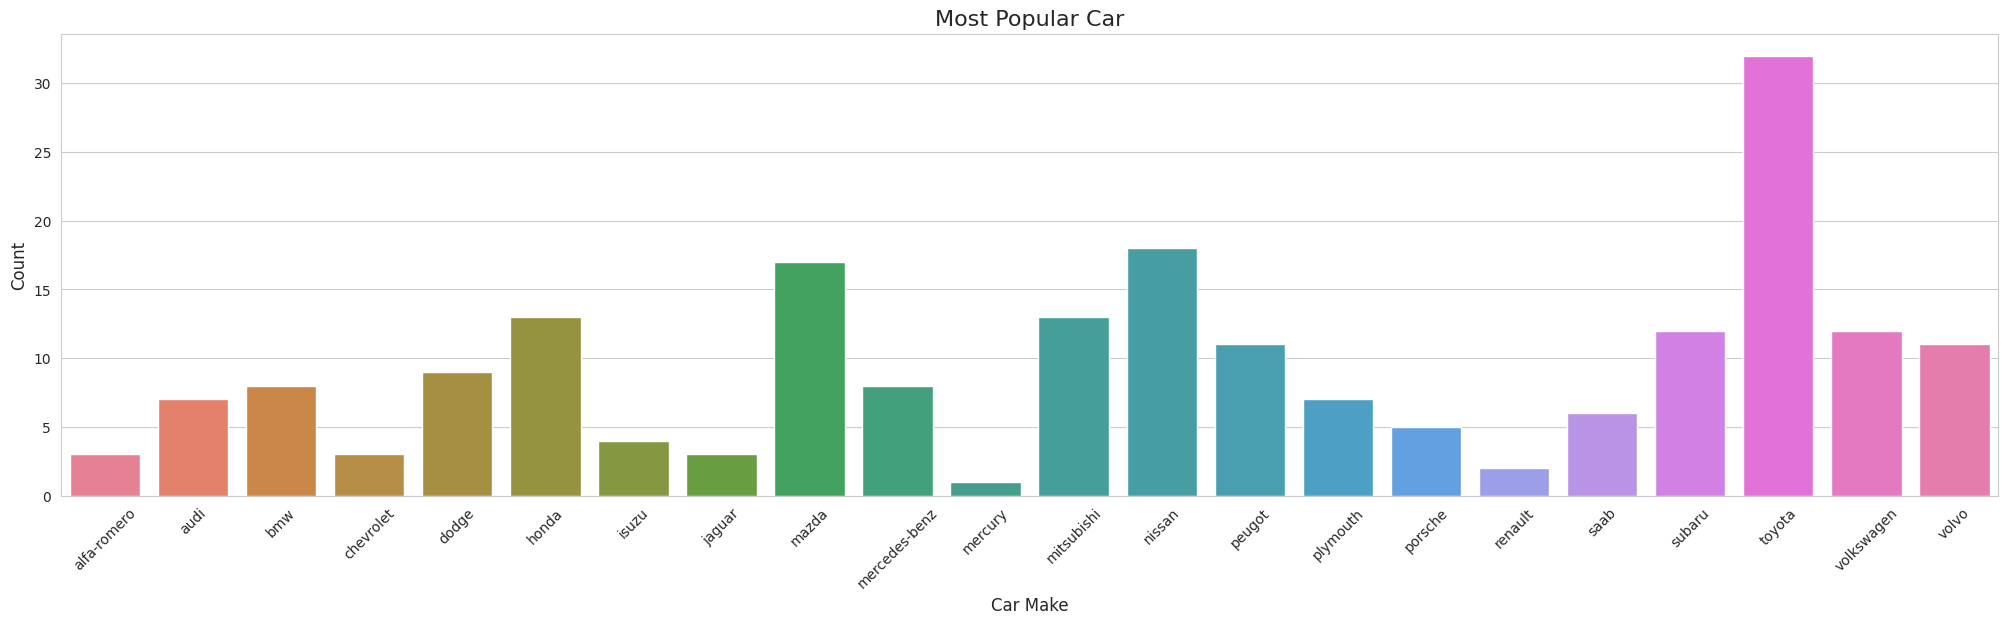

In [29]:
def make(data_frame):
    plt.figure(figsize=(25, 6))
    sns.countplot(x=data_frame['make'], data=data_frame, hue=data_frame['make'], dodge=False, legend=False)  # Використання 'hue' замість 'palette'
    plt.title('Most Popular Car', fontsize=16)
    plt.xlabel('Car Make', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Обертання міток на осі X
    plt.show()
    
make(cleaned_data_frame_2)

The most expensive car

In [30]:
def price(data_frame):
    plt.figure(figsize=(15, 6))
    plt.bar(data_frame["make"], data_frame["price"], color='red')
    plt.title('Car Maker vs Price', fontsize=16)
    plt.xlabel('Car Make', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(rotation=45)  # Обертання міток на осі X
    plt.legend(['Price'], loc='upper right')  # Додавання легенди
    plt.show()

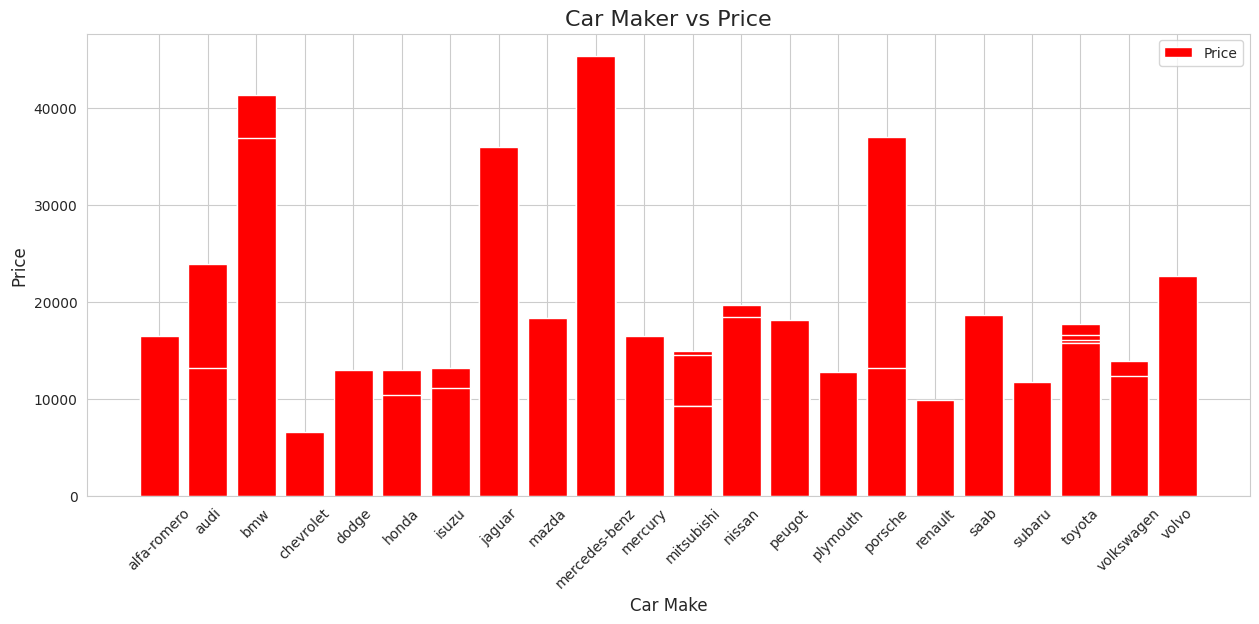

In [31]:
price(cleaned_data_frame_2)

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

https://anyi-guo.medium.com/correlation-pearson-vs-spearman-c15e581c12ce


Коефіцієнт кореляції вимірює, наскільки дві змінні мають тенденцію змінюватися по відношенню одна до одної. Коефіцієнт характеризує як напрямок, так і силу відносин.<br>

Кореляція Пірсона (Р)<br>
About this method:<br>
1) Кореляція Пірсона (названа на честь Карла Пірсона) використовується для того, щоб показати лінійну залежність між двома змінними.<br>
2) Кореляція Пірсона повертає значення між [-1, 1], де 1 означає повну позитивну кореляцію, а -1 повну негативну кореляцію.<br>
3) Кореляція Пірсона використовує середнє та стандартне відхилення в розрахунках, що означає, що це параметричний метод і він припускає гауссовий розподіл даних.<br>
4) Кореляція Пірсона є найпопулярнішим методом обчислення кореляції, і вона, як правило, є реалізацією за замовчуванням у багатьох мовах програмування. Наприклад, якщо ви запустите метод corr() у фреймі даних Pandas, він обчислить кореляцію Пірсона за замовчуванням, якщо ви явно не перевизначите його.<br>

Недолік:<br>
Проблема кореляції Пірсона полягає в тому, що вона чутлива до викидів і може привести вас до неправильного висновку в залежності від даних.<br>


Кореляція Спірмена (S)<br>
Кореляція Спірмена (названа на честь Чарльза Спірмена) є непараметричною версією кореляцій Пірсона. Його використовують, коли:<br>
About this method:<br>
1) Зв'язок між двома змінними є нелінійним (наприклад, зв'язок, який іноді сильніший, а іноді слабший залежно від даних).
2) Змінні мають негауссівський розподіл.
3) Подібно до кореляції Пірсона, Спірмен також повертає значення між [-1,1] для повної негативної кореляції та повної позитивної кореляції відповідно.

In [32]:
from scipy.stats import pearsonr, spearmanr

def calculate_correlation(data_frame, attribute1, attribute2):
    # Виділяємо значення атрибутів з датафрейму
    values1 = data_frame[attribute1]
    values2 = data_frame[attribute2]
    
    # Розрахунок коефіцієнта Пірсона
    pearson_corr, _ = pearsonr(values1, values2)
    
    # Розрахунок коефіцієнта Спірмена
    spearman_corr, _ = spearmanr(values1, values2)
    
    return pearson_corr, spearman_corr

# Приклад використання
pearson_coefficient, spearman_coefficient = calculate_correlation(cleaned_data_frame_2, 'engine_size', 'price')

print("Pearson correlation coefficient:", pearson_coefficient)
print("Spearman correlation coefficient:", spearman_coefficient)

Pearson correlation coefficient: 0.861752243685972
Spearman correlation coefficient: 0.8079865267779397


Якщо S >> P або S << P , це означає, що кореляція монотонна, але не лінійна.

In [33]:
def scatter_with_hue_1(data_frame, x_attribute, y_attribute, hue_attribute):
    plt.figure(figsize=(15, 6))
    sns.scatterplot(data=data_frame, x=x_attribute, y=y_attribute, hue=hue_attribute, palette='viridis')
    
    # Додаємо лінію апроксимації
    sns.regplot(data=data_frame, x=x_attribute, y=y_attribute, scatter=False, color='black')
    
    plt.title(f'{x_attribute} vs {y_attribute} with {hue_attribute}', fontsize=16)
    plt.xlabel(x_attribute, fontsize=12)
    plt.ylabel(y_attribute, fontsize=12)
    plt.legend(title=hue_attribute, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

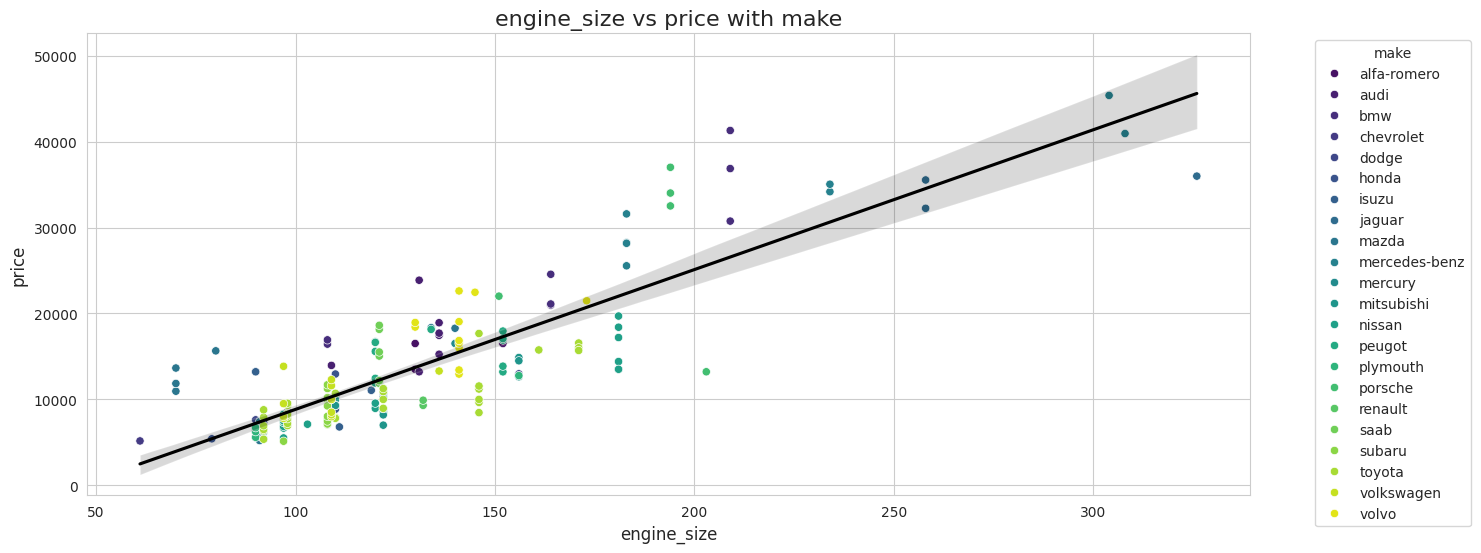

In [34]:
scatter_with_hue_1(cleaned_data_frame_2, 'engine_size', 'price', 'make')


Апроксимація - це процес побудови простішої моделі або функції, яка наближено описує складні дані або явище. Основна мета апроксимації - знайти таку функцію або модель, яка найкращим чином підходить до набору даних, забезпечуючи при цьому певний рівень точності.

У контексті діаграм розсіювання апроксимація може бути використана для виявлення тенденцій або закономірностей у взаємозв'язку між двома змінними. Наприклад, за допомогою апроксимації можна намагатися побудувати лінію чи криву, яка найкращим чином пасуватиме до розсіюваних точок на графіку. Це дозволяє зрозуміти загальний тренд у залежності між змінними і може бути корисним для прогнозування або моделювання.

6. Провести One Hot Encoding категоріального string атрибуту.<br>
https://www.analyticsvidhya.com/blog/2023/12/how-to-do-one-hot-encoding/<br>

One-hot encoding — це техніка машинного навчання , яка перетворює категоричні дані, як-от кольори (червоний, зелений, синій), у числові дані для розуміння машинами. Він створює нові двійкові стовпці для кожної категорії, причому 1 позначає наявність цієї категорії, а 0 - в інших місцях. Це дозволяє алгоритмам машинного навчання обробляти інформацію в категорійних даних без неправильного тлумачення порядку між категоріями.<br>

Це техніка , яка використовується для перетворення категоріальних даних у двійкову матрицю. Уявіть, що кожній категорії присвоюється унікальний двійковий вектор, де наявність категорії позначається «1», а відсутність — «0». Цей метод усуває ієрархічний порядок, який може передбачати числове кодування, дозволяючи моделям розглядати кожну категорію з однаковою важливістю.


In [35]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(data_frame, columns_to_encode):
    df = data_frame.copy()
    encoder = OneHotEncoder()  
    encoded_data = encoder.fit_transform(df[columns_to_encode])
    encoded_feature_names = encoder.get_feature_names_out(columns_to_encode)
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_feature_names)
    df_encoded = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)
    return df_encoded

def one_hot_encoding_dummies(data_frame, columns_to_encode):
    df = data_frame.copy()
    encoded_df_dummies = pd.get_dummies(df, columns=columns_to_encode)
    return encoded_df_dummies


In [36]:
df_encoded = one_hot_encoding(cleaned_data_frame_3, ['fuel_type'])
print_head(df_encoded)

encoded_df_dummies = one_hot_encoding_dummies(cleaned_data_frame_3, ['fuel_type'])
print_head(encoded_df_dummies)

Перші 15 рядків DataFrame:
+--------------------+--------------------+-------------+------------+--------------+-------------+--------------+-----------------+---------------------+--------------------+---------------------+---------------------+---------------------+-------------+------------------+---------------------+-------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------------------+---------------+
|     symboling      | normalized_losses  |    make     | aspiration | num_of_doors | body_style  | drive_wheels | engine_location |     wheel_base      |       length       |        width        |       height        |     curb_weight     | engine_type | num_of_cylinders |     engine_size     | fuel_system |        bore         |       stroke        |  compression_ratio  |     horsepower      |      peak_rpm       |      city_mpg       |     high


7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - 
https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

# Візуалізація даних в одному вимірі (1-D)

Одним з найшвидших і найефективніших способів візуалізації всіх числових даних і їх розподілу є використання гістограм за допомогою pandas

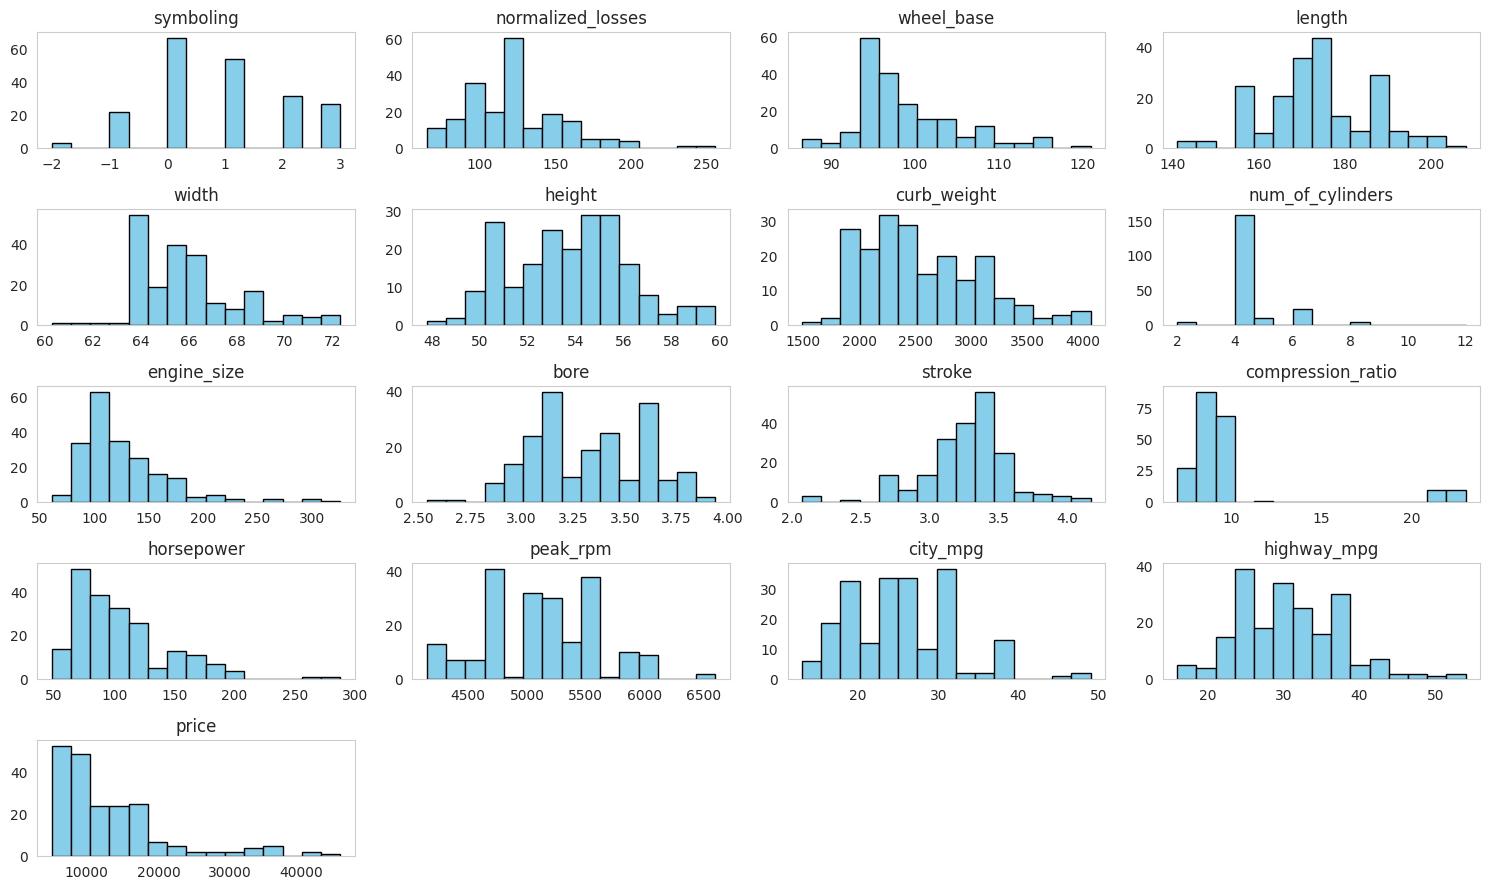

In [37]:
cleaned_data_frame_2.hist(bins=15, color='skyblue', edgecolor='black', linewidth=1.0, grid=False, figsize=(10, 6))
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
plt.show()


Наведені вище графіки дають гарне уявлення про базовий розподіл даних будь-якого з атрибутів.

# Візуалізація даних у двох вимірах (2-D)

Один із найкращих способів перевірити потенційні зв'язки або кореляції між різними атрибутами даних – це використати попарну кореляційну матрицю та зобразити її у вигляді теплової карти.

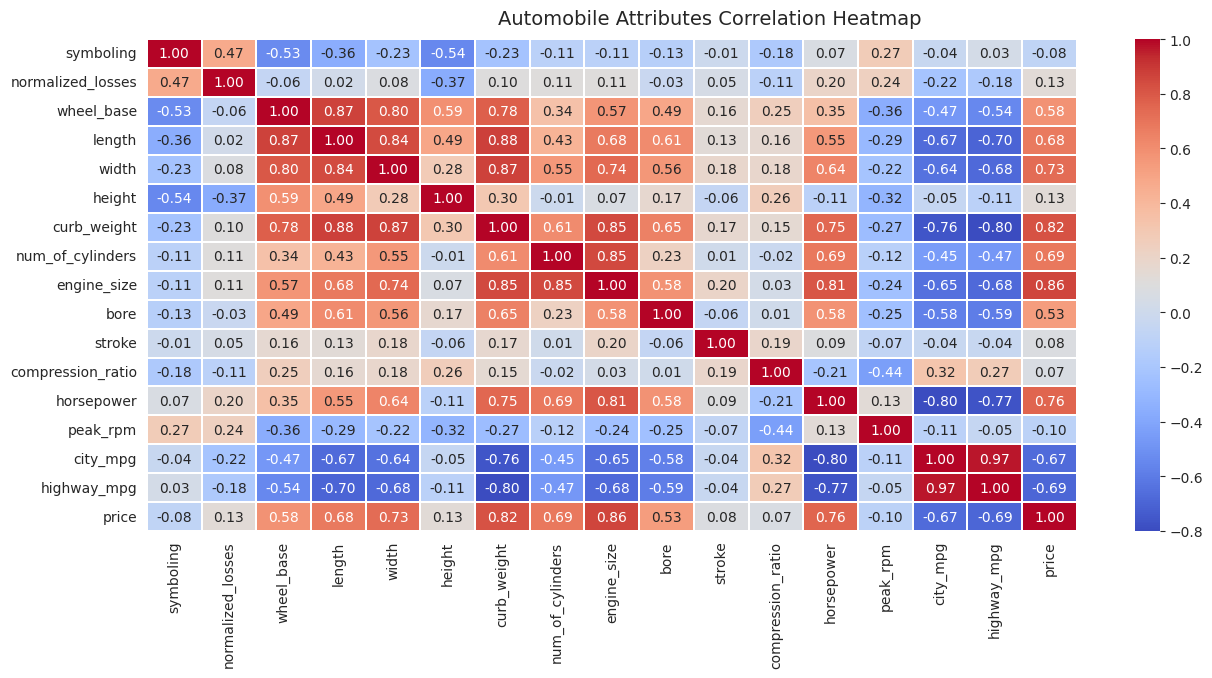

In [38]:
f, ax = plt.subplots(figsize=(15, 6))
numeric_columns = cleaned_data_frame_2.select_dtypes(include=['number']).columns
numeric_data_frame = cleaned_data_frame_2[numeric_columns]
corr = numeric_data_frame.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Automobile Attributes Correlation Heatmap', fontsize=14)

Градієнти на тепловій карті змінюються залежно від сили кореляції, і ви можете чітко побачити, що дуже легко помітити потенційні атрибути, які мають сильні кореляції між собою. 

Іншим способом візуалізації є використання попарних діаграм розсіювання серед атрибутів, що представляють інтерес.<br>
Візуалізація двовимірних даних за допомогою попарних точкових діаграм

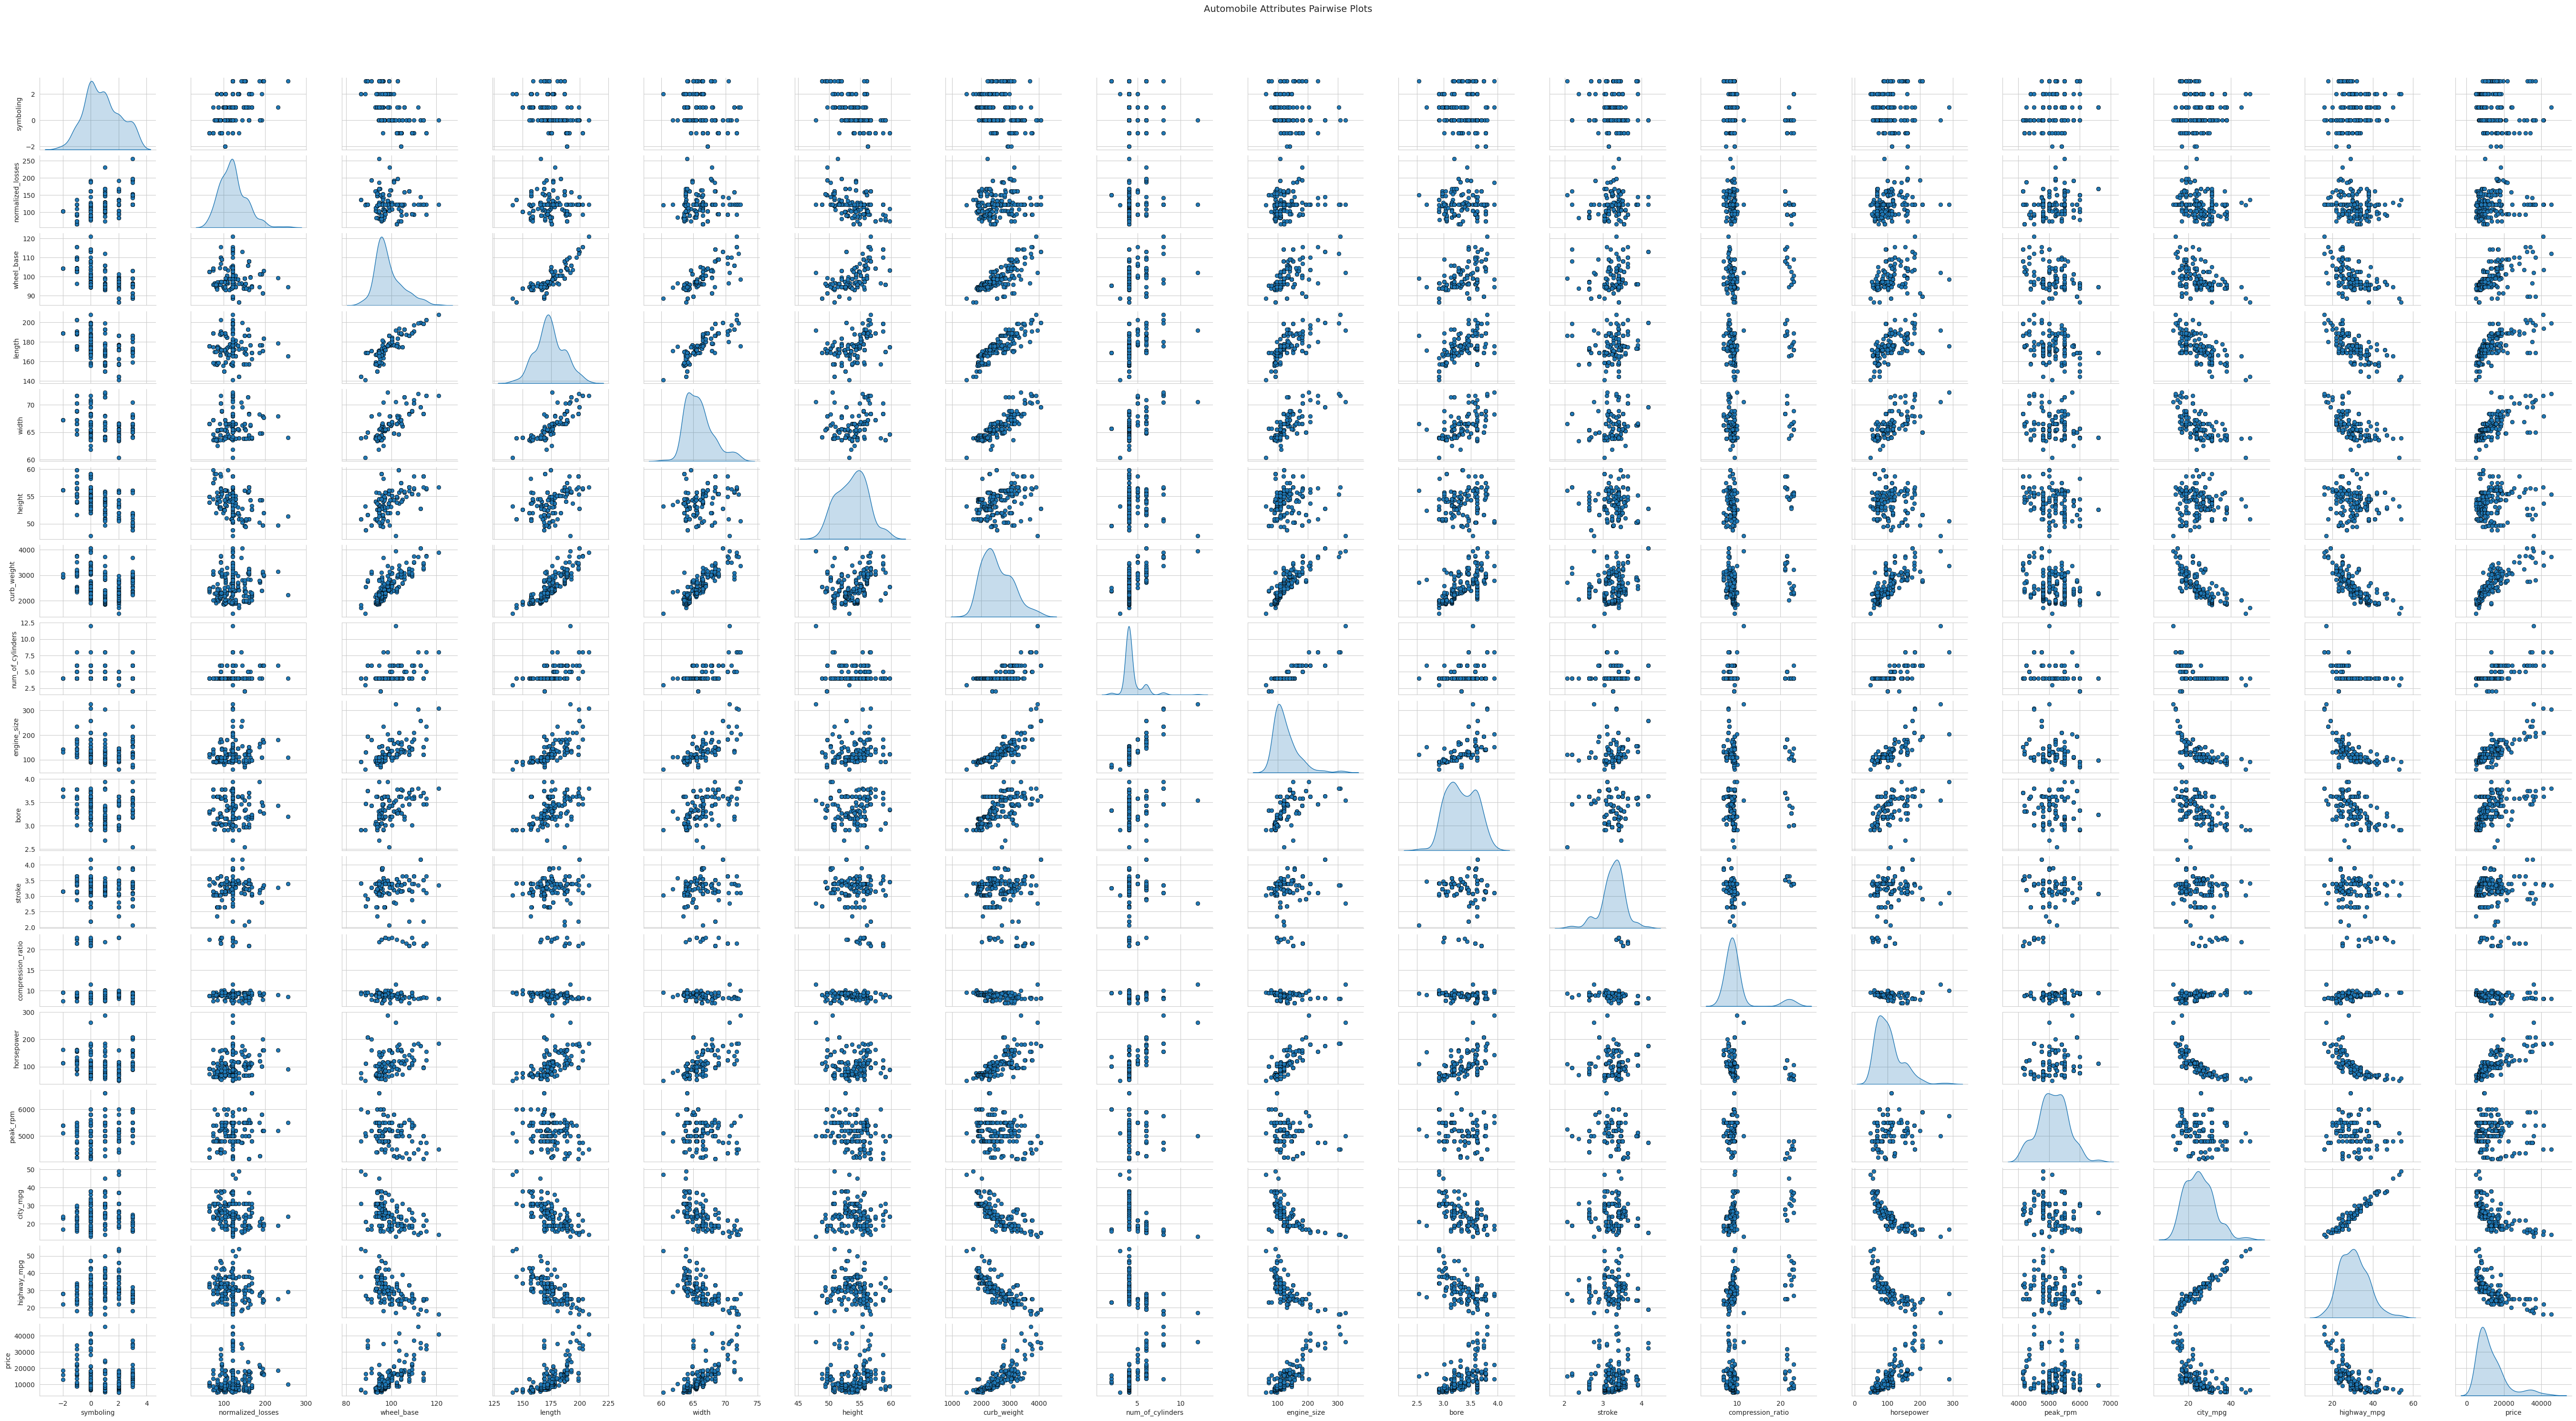

In [52]:
# Pair-wise Scatter Plots
numeric_columns = cleaned_data_frame_2.select_dtypes(include=['number']).columns
# numeric_columns = ['horsepower', 'num_of_cylinders']
numeric_data_frame = cleaned_data_frame_2[numeric_columns]
pp = sns.pairplot(cleaned_data_frame_2[numeric_columns], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))


fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Automobile Attributes Pairwise Plots', fontsize=14)

Виходячи з наведеного вище графіка, ви можете побачити, що точкові діаграми також є хорошим способом спостереження потенційних взаємозв'язків або закономірностей у двовимірному вимірі атрибутів даних.

# Візуалізація даних у трьох вимірах (3-D)

Розглядаючи три атрибути або виміри в даних, ми можемо візуалізувати їх, розглянувши попарну діаграму розсіювання та ввівши поняття кольору або відтінку, щоб відокремити значення в категоріальному вимірі.

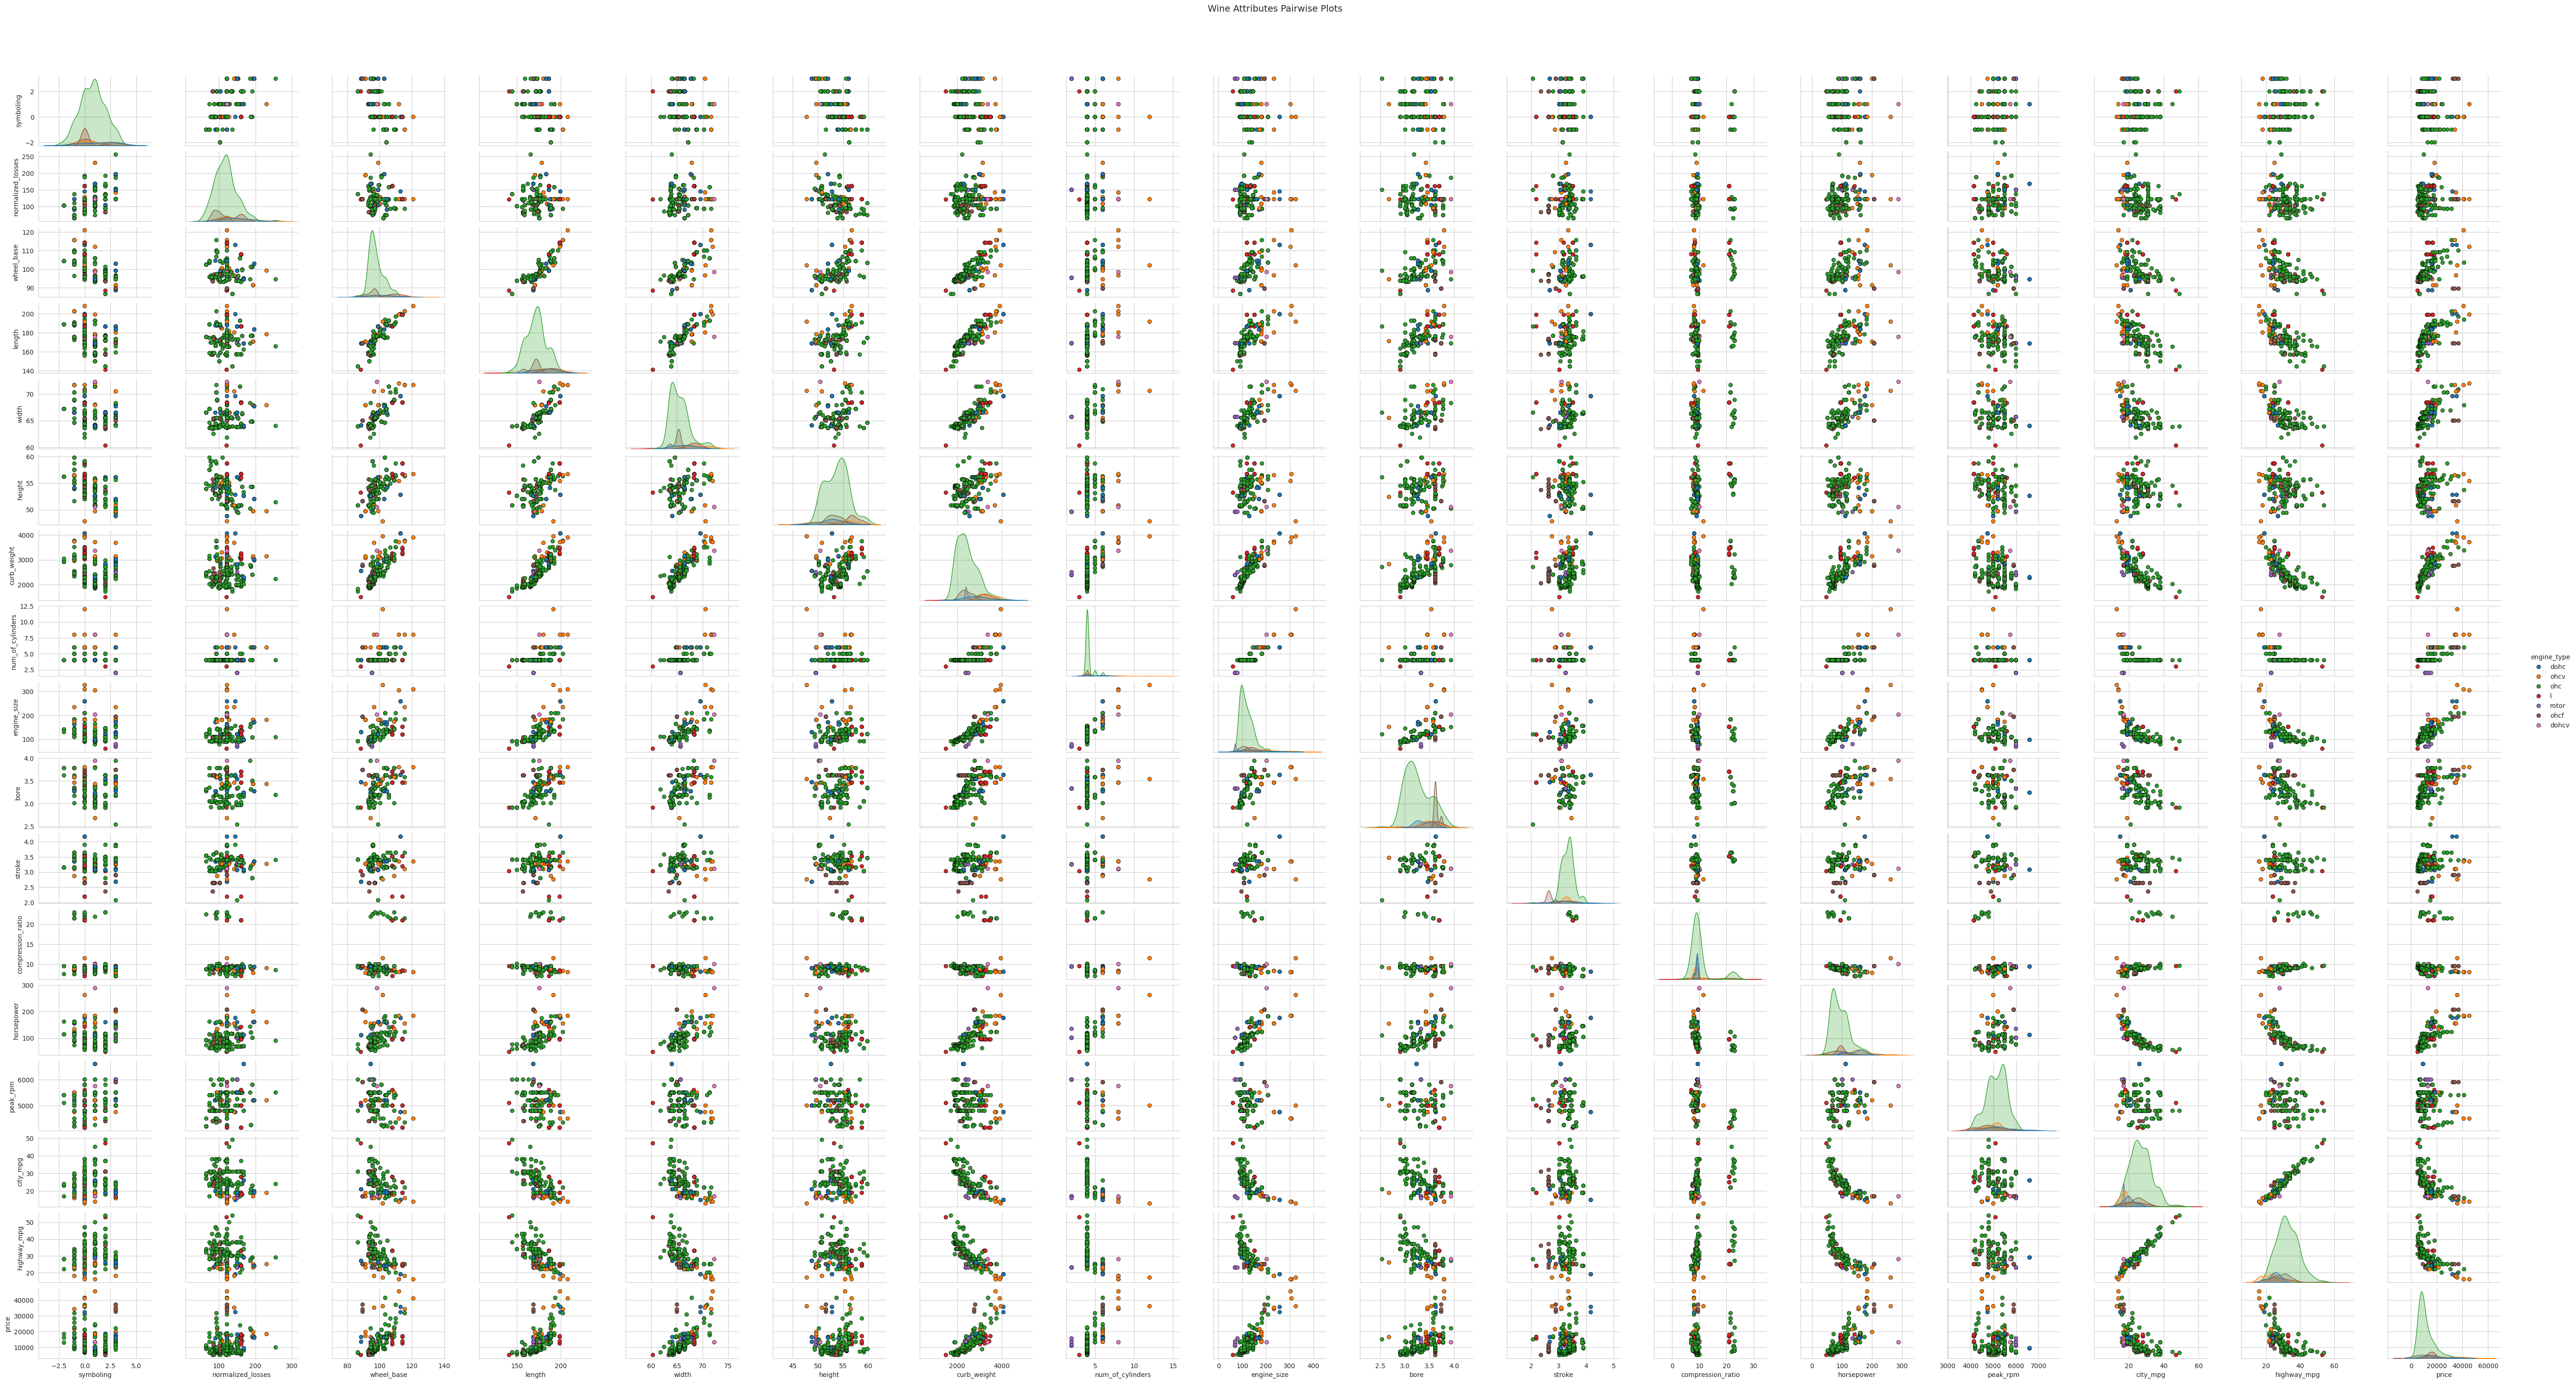

In [50]:
# Scatter Plot with Hue for visualizing data in 3-D
numeric_columns = cleaned_data_frame_2.select_dtypes(include=['number']).columns
numeric_data_frame = cleaned_data_frame_2[numeric_columns]
pp = sns.pairplot(cleaned_data_frame_2, hue="engine_type", height=1.8, aspect=1.8, 
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Automobile Attributes Pairwise Plots', fontsize=14)

Overhead Camshaft, або "верхній розподільний вал" найбільше застручається в автомобілів.

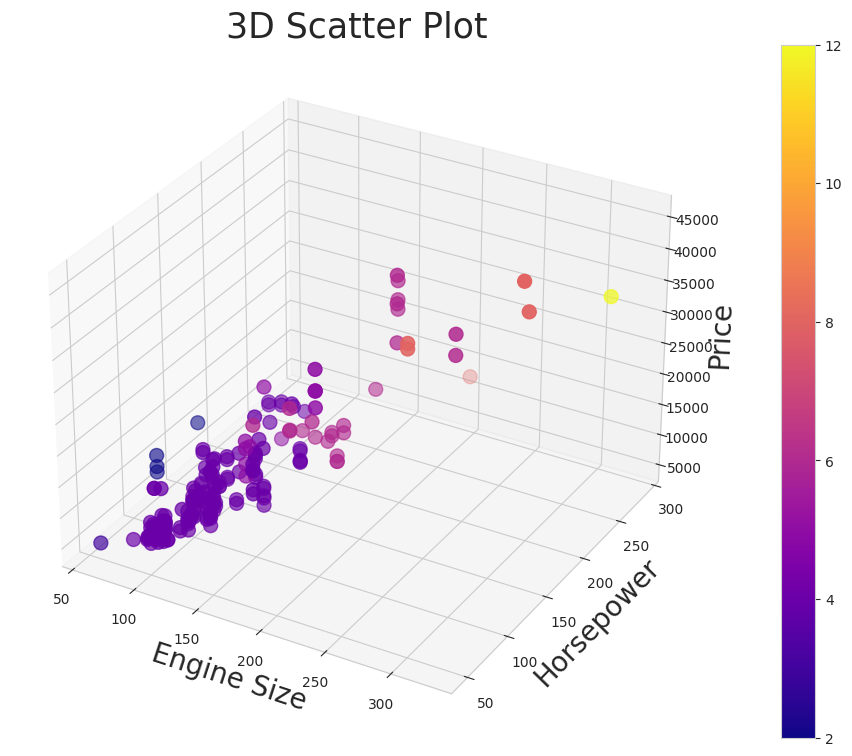

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def visual_3D(data_frame):
    fig = plt.figure(figsize=(20, 9))
    fig.patch.set_alpha(0.5)

    ax = fig.add_subplot(111, projection='3d')
    ax.patch.set_alpha(0)

    x = data_frame['engine_size']
    y = data_frame['horsepower']
    z = data_frame['price']
    color = data_frame['num_of_cylinders']

    cb1 = ax.scatter(x, y, z, c=color, cmap=plt.cm.plasma, s=100)  # Changing the colormap to 'plasma'
    plt.colorbar(cb1, ax=ax)
    ax.set_xlabel('Engine Size', fontsize=20)
    ax.set_ylabel('Horsepower', fontsize=20)
    ax.set_zlabel('Price', fontsize=20)
    ax.set_title('3D Scatter Plot', fontsize=25)  # Adding a title

    plt.show()

visual_3D(cleaned_data_frame_2)
